In [35]:
import os
from tqdm import tqdm  # 导入tqdm库
import time  # 导入time模块

def check_swc_multiple_children(swc_file_path):
    # 读取SWC文件内容
    with open(swc_file_path, 'r') as f:
        lines = f.readlines()

    node_ids = set()  # 用来存储所有节点ID
    parent_ids = set()  # 用来存储所有父节点ID
    id_to_parent = {}  # 用来存储节点ID与其父节点的关系
    parent_to_children = {}  # 用来存储父节点到子节点的映射

    # 遍历每行SWC文件
    for line in lines:
        # 跳过注释行
        if line.startswith('#'):
            continue
        parts = line.strip().split()
        node_id = int(parts[0])  # 节点ID
        parent_id = int(parts[6])  # 父节点ID

        # 添加节点ID和父节点ID到集合中
        node_ids.add(node_id)
        parent_ids.add(parent_id)

        # 存储节点与父节点的关系
        id_to_parent[node_id] = parent_id

        # 存储父节点与子节点的关系
        if parent_id != 1:  # 排除胞体（parent_id为-1的节点）
            if parent_id not in parent_to_children:
                parent_to_children[parent_id] = []
            parent_to_children[parent_id].append(node_id)

    # 检查是否有非胞体节点有两个以上的子节点
    problematic_nodes = []
    for parent_id, children in parent_to_children.items():
        if len(children) >= 3:
            problematic_nodes.append((parent_id, children))

    if problematic_nodes:
        for parent_id, children in problematic_nodes:
            print(f"警告：父节点 {parent_id} 有多个子节点：{children}")
        return False  # 如果有问题，返回False

    # 没有问题，返回True
    return True

def check_all_swc_files_in_directory(directory_path):
    # 获取目录下所有SWC文件
    swc_files = []
    for root, _, files in os.walk(directory_path):
        for file in files:
            if file.endswith('.swc'):
                swc_files.append(os.path.join(root, file))

    # 用于记录是否所有文件都通过检查
    all_files_valid = True

    # 使用tqdm显示进度条
    for swc_file_path in tqdm(swc_files, desc="检查SWC文件进度", unit="文件"):
        valid = check_swc_multiple_children(swc_file_path)
        if not valid:
            all_files_valid = False  # 只要有一个文件不合法，就将标志设置为False

    # 检查所有文件是否都通过了检查
    if all_files_valid:
        print("所有SWC文件检查通过！")
    else:
        print("部分SWC文件存在问题，检查警告信息。")

# 设置SWC文件所在的路径
#directory_path = r"G:\emergency_mouse\data\SEU-ALLEN_auto_dendrites_v2_179k"
directory_path = r"G:\energency_fly\data\sk_lod1_783_healed"
check_all_swc_files_in_directory(directory_path)

检查SWC文件进度:   0%|                       | 25/139273 [00:00<09:24, 246.87文件/s]

警告：父节点 11 有多个子节点：[25, 26, 27]
警告：父节点 158 有多个子节点：[121, 122, 123, 124]
警告：父节点 231 有多个子节点：[185, 186, 187]
警告：父节点 475 有多个子节点：[450, 451, 452, 453]
警告：父节点 689 有多个子节点：[650, 651, 652]
警告：父节点 920 有多个子节点：[888, 889, 890]
警告：父节点 948 有多个子节点：[961, 962, 963]
警告：父节点 1095 有多个子节点：[1071, 1072, 1073, 1074]
警告：父节点 9 有多个子节点：[11, 12, 13]
警告：父节点 119 有多个子节点：[97, 98, 99]
警告：父节点 1445 有多个子节点：[1425, 1426, 1427]
警告：父节点 1465 有多个子节点：[1448, 1449, 1450]
警告：父节点 1815 有多个子节点：[1812, 1813, 1814]
警告：父节点 1881 有多个子节点：[1882, 1883, 1884]
警告：父节点 2071 有多个子节点：[2044, 2045, 2046]
警告：父节点 2405 有多个子节点：[2203, 2204, 2205]
警告：父节点 2877 有多个子节点：[2896, 2897, 2898]
警告：父节点 3080 有多个子节点：[3071, 3072, 3073]
警告：父节点 3485 有多个子节点：[3480, 3481, 3482]
警告：父节点 3998 有多个子节点：[4019, 4020, 4021]
警告：父节点 4231 有多个子节点：[4223, 4224, 4225]
警告：父节点 4347 有多个子节点：[4342, 4343, 4344]
警告：父节点 4483 有多个子节点：[4390, 4391, 4392]
警告：父节点 4495 有多个子节点：[4479, 4480, 4481]
警告：父节点 5144 有多个子节点：[5132, 5133, 5134]
警告：父节点 5548 有多个子节点：[5560, 5561, 5562]
警告：父节点 111 有多个子节点：[121, 122, 123]
警告：父节点 144

检查SWC文件进度:   0%|                       | 73/139273 [00:00<13:24, 173.04文件/s]

警告：父节点 628 有多个子节点：[582, 583, 584]
警告：父节点 675 有多个子节点：[612, 613, 614]
警告：父节点 836 有多个子节点：[838, 839, 840]
警告：父节点 903 有多个子节点：[880, 881, 882]
警告：父节点 835 有多个子节点：[883, 884, 885]
警告：父节点 964 有多个子节点：[949, 950, 951]
警告：父节点 1100 有多个子节点：[1083, 1084, 1085]
警告：父节点 1221 有多个子节点：[1244, 1245, 1246]
警告：父节点 1231 有多个子节点：[1261, 1262, 1263]
警告：父节点 1408 有多个子节点：[1405, 1406, 1407]
警告：父节点 1510 有多个子节点：[1421, 1422, 1423, 1424]
警告：父节点 1449 有多个子节点：[1457, 1458, 1459, 1460]
警告：父节点 1515 有多个子节点：[1521, 1522, 1523]
警告：父节点 1662 有多个子节点：[1664, 1665, 1666]
警告：父节点 1699 有多个子节点：[1692, 1693, 1694]
警告：父节点 1812 有多个子节点：[1813, 1814, 1815]
警告：父节点 2191 有多个子节点：[2244, 2245, 2246]
警告：父节点 2234 有多个子节点：[2276, 2277, 2278]
警告：父节点 2456 有多个子节点：[2433, 2434, 2435]
警告：父节点 2424 有多个子节点：[2450, 2451, 2452, 2453]
警告：父节点 2519 有多个子节点：[2490, 2491, 2492]
警告：父节点 3036 有多个子节点：[3030, 3031, 3032]
警告：父节点 3173 有多个子节点：[3178, 3179, 3180, 3181]
警告：父节点 3339 有多个子节点：[3353, 3354, 3355]
警告：父节点 155 有多个子节点：[145, 146, 147]
警告：父节点 370 有多个子节点：[345, 346, 347]
警告：父节点 467 有多个子节点：[4

检查SWC文件进度:   0%|                       | 92/139273 [00:00<14:53, 155.74文件/s]

警告：父节点 548 有多个子节点：[544, 545, 546, 547]
警告：父节点 930 有多个子节点：[876, 877, 878]
警告：父节点 1725 有多个子节点：[1702, 1703, 1704]
警告：父节点 2769 有多个子节点：[2759, 2760, 2761]
警告：父节点 3629 有多个子节点：[3617, 3618, 3619]
警告：父节点 3901 有多个子节点：[3872, 3873, 3874]
警告：父节点 4028 有多个子节点：[4001, 4002, 4003]
警告：父节点 4791 有多个子节点：[4813, 4814, 4815]
警告：父节点 5145 有多个子节点：[5193, 5194, 5195]
警告：父节点 5950 有多个子节点：[5882, 5883, 5884]
警告：父节点 5926 有多个子节点：[5919, 5920, 5921]
警告：父节点 6131 有多个子节点：[6141, 6142, 6143]
警告：父节点 6555 有多个子节点：[6552, 6553, 6554]
警告：父节点 7825 有多个子节点：[7857, 7858, 7859]
警告：父节点 7914 有多个子节点：[7889, 7890, 7891]
警告：父节点 8507 有多个子节点：[8550, 8551, 8552]
警告：父节点 9191 有多个子节点：[9198, 9199, 9200]
警告：父节点 9290 有多个子节点：[9205, 9206, 9207]
警告：父节点 9598 有多个子节点：[9518, 9519, 9520, 9521]
警告：父节点 9673 有多个子节点：[9620, 9621, 9622]
警告：父节点 9841 有多个子节点：[9926, 9927, 9928]
警告：父节点 10248 有多个子节点：[10210, 10211, 10212]
警告：父节点 10434 有多个子节点：[10471, 10472, 10473]
警告：父节点 10901 有多个子节点：[10838, 10839, 10840]
警告：父节点 10843 有多个子节点：[10859, 10860, 10861]
警告：父节点 11322 有多个子节点：[11291, 112

检查SWC文件进度:   0%|                      | 123/139273 [00:00<20:02, 115.74文件/s]

警告：父节点 448 有多个子节点：[498, 499, 500]
警告：父节点 1717 有多个子节点：[1729, 1730, 1731]
警告：父节点 1825 有多个子节点：[1820, 1821, 1822]
警告：父节点 2019 有多个子节点：[2011, 2012, 2013]
警告：父节点 2680 有多个子节点：[2672, 2673, 2674]
警告：父节点 3361 有多个子节点：[3357, 3358, 3359]
警告：父节点 3891 有多个子节点：[3884, 3885, 3886]
警告：父节点 4848 有多个子节点：[4875, 4876, 4877]
警告：父节点 5508 有多个子节点：[5480, 5481, 5482]
警告：父节点 5607 有多个子节点：[5572, 5573, 5574]
警告：父节点 342 有多个子节点：[351, 352, 353]
警告：父节点 1341 有多个子节点：[1353, 1354, 1355]
警告：父节点 1390 有多个子节点：[1385, 1386, 1387]
警告：父节点 1551 有多个子节点：[1557, 1558, 1559]
警告：父节点 1732 有多个子节点：[1734, 1735, 1736]
警告：父节点 1966 有多个子节点：[1977, 1978, 1979]
警告：父节点 2048 有多个子节点：[2065, 2066, 2067]
警告：父节点 2933 有多个子节点：[2902, 2903, 2904]
警告：父节点 2941 有多个子节点：[2946, 2947, 2948]
警告：父节点 3161 有多个子节点：[3152, 3153, 3154]
警告：父节点 3146 有多个子节点：[3164, 3165, 3166]
警告：父节点 3233 有多个子节点：[3238, 3239, 3240]
警告：父节点 3366 有多个子节点：[3361, 3362, 3363, 3364, 3365]
警告：父节点 1246 有多个子节点：[1263, 1264, 1265]
警告：父节点 1390 有多个子节点：[1386, 1387, 1388]
警告：父节点 1487 有多个子节点：[1505, 1506, 1507]
警告：父节点 1

检查SWC文件进度:   0%|                      | 137/139273 [00:01<22:14, 104.22文件/s]

警告：父节点 21 有多个子节点：[84, 85, 86, 87]
警告：父节点 82 有多个子节点：[149, 150, 151]
警告：父节点 207 有多个子节点：[203, 204, 205]
警告：父节点 266 有多个子节点：[271, 272, 273]
警告：父节点 243 有多个子节点：[321, 322, 323]
警告：父节点 396 有多个子节点：[392, 393, 394]
警告：父节点 465 有多个子节点：[470, 471, 472]
警告：父节点 484 有多个子节点：[481, 482, 483]
警告：父节点 507 有多个子节点：[504, 505, 506]
警告：父节点 614 有多个子节点：[615, 616, 617]
警告：父节点 752 有多个子节点：[738, 739, 740]
警告：父节点 1025 有多个子节点：[1006, 1007, 1008]
警告：父节点 1532 有多个子节点：[1524, 1525, 1526]
警告：父节点 1658 有多个子节点：[1661, 1662, 1663]
警告：父节点 2494 有多个子节点：[2498, 2499, 2500]
警告：父节点 3052 有多个子节点：[3047, 3048, 3049]
警告：父节点 4143 有多个子节点：[4178, 4179, 4180]
警告：父节点 4363 有多个子节点：[4389, 4390, 4391]
警告：父节点 5460 有多个子节点：[5470, 5471, 5472]
警告：父节点 5946 有多个子节点：[5971, 5972, 5973]
警告：父节点 6424 有多个子节点：[6402, 6403, 6404, 6405]
警告：父节点 6410 有多个子节点：[6411, 6412, 6413]
警告：父节点 6383 有多个子节点：[6431, 6432, 6433]
警告：父节点 7247 有多个子节点：[7241, 7242, 7243]
警告：父节点 7489 有多个子节点：[7497, 7498, 7499]
警告：父节点 8756 有多个子节点：[8752, 8753, 8754]
警告：父节点 3116 有多个子节点：[3135, 3136, 3137]
警告：父节点 3355 有

检查SWC文件进度:   0%|                       | 149/139273 [00:01<23:53, 97.05文件/s]

警告：父节点 1071 有多个子节点：[1050, 1051, 1052]
警告：父节点 1438 有多个子节点：[1388, 1389, 1390]
警告：父节点 1942 有多个子节点：[1936, 1937, 1938]
警告：父节点 1981 有多个子节点：[1951, 1952, 1953]
警告：父节点 1996 有多个子节点：[1968, 1969, 1970]
警告：父节点 2013 有多个子节点：[1995, 1996, 1997]
警告：父节点 2273 有多个子节点：[2247, 2248, 2249]
警告：父节点 2495 有多个子节点：[2483, 2484, 2485]
警告：父节点 2669 有多个子节点：[2672, 2673, 2674]
警告：父节点 2886 有多个子节点：[2748, 2749, 2750]
警告：父节点 2810 有多个子节点：[2900, 2901, 2902, 2903]
警告：父节点 3266 有多个子节点：[3220, 3221, 3222]
警告：父节点 3599 有多个子节点：[3536, 3537, 3538]
警告：父节点 3781 有多个子节点：[3770, 3771, 3772]
警告：父节点 4164 有多个子节点：[4127, 4128, 4129]
警告：父节点 4508 有多个子节点：[4367, 4368, 4369]
警告：父节点 4380 有多个子节点：[4411, 4412, 4413]
警告：父节点 4548 有多个子节点：[4485, 4486, 4487]
警告：父节点 4572 有多个子节点：[4564, 4565, 4566]
警告：父节点 4740 有多个子节点：[4764, 4765, 4766]
警告：父节点 4836 有多个子节点：[4847, 4848, 4849]
警告：父节点 4913 有多个子节点：[4943, 4944, 4945]
警告：父节点 5067 有多个子节点：[4958, 4959, 4960]
警告：父节点 5138 有多个子节点：[5067, 5068, 5069]
警告：父节点 5087 有多个子节点：[5076, 5077, 5078]
警告：父节点 5134 有多个子节点：[5160, 5161, 5162]
警告：父节点

检查SWC文件进度:   0%|                       | 170/139273 [00:01<26:45, 86.64文件/s]

警告：父节点 1081 有多个子节点：[1033, 1034, 1035]
警告：父节点 1090 有多个子节点：[1076, 1077, 1078]
警告：父节点 1265 有多个子节点：[1249, 1250, 1251, 1252]
警告：父节点 1419 有多个子节点：[1369, 1370, 1371]
警告：父节点 1547 有多个子节点：[1530, 1531, 1532]
警告：父节点 1772 有多个子节点：[1702, 1703, 1704]
警告：父节点 1941 有多个子节点：[1887, 1888, 1889]
警告：父节点 2375 有多个子节点：[2407, 2408, 2409]
警告：父节点 2746 有多个子节点：[2765, 2766, 2767]
警告：父节点 2817 有多个子节点：[2828, 2829, 2830]
警告：父节点 2831 有多个子节点：[2841, 2842, 2843]
警告：父节点 3290 有多个子节点：[3282, 3283, 3284]
警告：父节点 3675 有多个子节点：[3668, 3669, 3670]
警告：父节点 3746 有多个子节点：[3732, 3733, 3734]
警告：父节点 3826 有多个子节点：[3830, 3831, 3832]
警告：父节点 166 有多个子节点：[173, 174, 175]
警告：父节点 609 有多个子节点：[593, 594, 595]
警告：父节点 669 有多个子节点：[657, 658, 659]
警告：父节点 1706 有多个子节点：[1701, 1702, 1703]
警告：父节点 1940 有多个子节点：[1915, 1916, 1917]
警告：父节点 2051 有多个子节点：[2061, 2062, 2063]
警告：父节点 2065 有多个子节点：[2086, 2087, 2088]
警告：父节点 2585 有多个子节点：[2561, 2562, 2563]
警告：父节点 2884 有多个子节点：[2899, 2900, 2901]
警告：父节点 3204 有多个子节点：[3176, 3177, 3178]
警告：父节点 3269 有多个子节点：[3273, 3274, 3275, 3276]
警告：父节点 3662 

检查SWC文件进度:   0%|                      | 200/139273 [00:01<20:56, 110.66文件/s]

警告：父节点 930 有多个子节点：[933, 934, 935]
警告：父节点 1373 有多个子节点：[1370, 1371, 1372]
警告：父节点 2993 有多个子节点：[2961, 2962, 2963]
警告：父节点 3439 有多个子节点：[3423, 3424, 3425]
警告：父节点 3548 有多个子节点：[3589, 3590, 3591, 3592]
警告：父节点 3655 有多个子节点：[3618, 3619, 3620]
警告：父节点 3889 有多个子节点：[3911, 3912, 3913]
警告：父节点 3985 有多个子节点：[4017, 4018, 4019]
警告：父节点 4327 有多个子节点：[4320, 4321, 4322]
警告：父节点 4294 有多个子节点：[4361, 4362, 4363]
警告：父节点 4465 有多个子节点：[4484, 4485, 4486]
警告：父节点 4844 有多个子节点：[4865, 4866, 4867]
警告：父节点 5053 有多个子节点：[5070, 5071, 5072]
警告：父节点 195 有多个子节点：[177, 178, 179]
警告：父节点 233 有多个子节点：[227, 228, 229]
警告：父节点 529 有多个子节点：[532, 533, 534]
警告：父节点 693 有多个子节点：[699, 700, 701]
警告：父节点 795 有多个子节点：[799, 800, 801]
警告：父节点 1642 有多个子节点：[1614, 1615, 1616]
警告：父节点 1765 有多个子节点：[1731, 1732, 1733, 1734]
警告：父节点 1813 有多个子节点：[1781, 1782, 1783]
警告：父节点 1834 有多个子节点：[1811, 1812, 1813]
警告：父节点 1861 有多个子节点：[1864, 1865, 1866]
警告：父节点 1936 有多个子节点：[1961, 1962, 1963]
警告：父节点 2063 有多个子节点：[2045, 2046, 2047]
警告：父节点 2121 有多个子节点：[2123, 2124, 2125]
警告：父节点 2219 有多个子节点：[2215

检查SWC文件进度:   0%|                      | 229/139273 [00:01<19:14, 120.48文件/s]

警告：父节点 1295 有多个子节点：[1274, 1275, 1276]
警告：父节点 1282 有多个子节点：[1290, 1291, 1292]
警告：父节点 1307 有多个子节点：[1301, 1302, 1303]
警告：父节点 1357 有多个子节点：[1345, 1346, 1347]
警告：父节点 1373 有多个子节点：[1396, 1397, 1398]
警告：父节点 1491 有多个子节点：[1487, 1488, 1489]
警告：父节点 1547 有多个子节点：[1533, 1534, 1535, 1536]
警告：父节点 1674 有多个子节点：[1681, 1682, 1683]
警告：父节点 79 有多个子节点：[72, 73, 74, 75]
警告：父节点 147 有多个子节点：[138, 139, 140]
警告：父节点 211 有多个子节点：[212, 213, 214]
警告：父节点 346 有多个子节点：[333, 334, 335]
警告：父节点 393 有多个子节点：[389, 390, 391]
警告：父节点 476 有多个子节点：[471, 472, 473]
警告：父节点 945 有多个子节点：[934, 935, 936, 937, 938]
警告：父节点 1078 有多个子节点：[1056, 1057, 1058]
警告：父节点 1112 有多个子节点：[1104, 1105, 1106]
警告：父节点 1121 有多个子节点：[1112, 1113, 1114]
警告：父节点 1445 有多个子节点：[1418, 1419, 1420]
警告：父节点 1751 有多个子节点：[1747, 1748, 1749, 1750]
警告：父节点 1831 有多个子节点：[1854, 1855, 1856]
警告：父节点 1930 有多个子节点：[1906, 1907, 1908]
警告：父节点 2081 有多个子节点：[2068, 2069, 2070]
警告：父节点 2096 有多个子节点：[2081, 2082, 2083]
警告：父节点 2186 有多个子节点：[2222, 2223, 2224]
警告：父节点 2521 有多个子节点：[2488, 2489, 2490]
警告：父节点 2682 有多个子节点

检查SWC文件进度:   0%|                       | 242/139273 [00:02<23:43, 97.68文件/s]

警告：父节点 96 有多个子节点：[103, 104, 105]
警告：父节点 303 有多个子节点：[279, 280, 281]
警告：父节点 537 有多个子节点：[541, 542, 543]
警告：父节点 577 有多个子节点：[562, 563, 564]
警告：父节点 641 有多个子节点：[583, 584, 585]
警告：父节点 831 有多个子节点：[850, 851, 852]
警告：父节点 1961 有多个子节点：[1969, 1970, 1971]
警告：父节点 2591 有多个子节点：[2610, 2611, 2612]
警告：父节点 2639 有多个子节点：[2645, 2646, 2647, 2648]
警告：父节点 3013 有多个子节点：[3030, 3031, 3032]
警告：父节点 3688 有多个子节点：[3663, 3664, 3665]
警告：父节点 3694 有多个子节点：[3711, 3712, 3713]
警告：父节点 3852 有多个子节点：[3837, 3838, 3839]
警告：父节点 3930 有多个子节点：[3953, 3954, 3955]
警告：父节点 4023 有多个子节点：[4011, 4012, 4013]
警告：父节点 4040 有多个子节点：[4052, 4053, 4054]
警告：父节点 4149 有多个子节点：[4157, 4158, 4159]
警告：父节点 4805 有多个子节点：[4798, 4799, 4800]
警告：父节点 5017 有多个子节点：[5003, 5004, 5005]
警告：父节点 5737 有多个子节点：[5725, 5726, 5727]
警告：父节点 71 有多个子节点：[64, 65, 66]
警告：父节点 1710 有多个子节点：[1705, 1706, 1707]
警告：父节点 7376 有多个子节点：[7364, 7365, 7366]
警告：父节点 7635 有多个子节点：[7632, 7633, 7634]
警告：父节点 310 有多个子节点：[325, 326, 327]
警告：父节点 435 有多个子节点：[427, 428, 429]
警告：父节点 1105 有多个子节点：[1087, 1088, 1089]
警告：父节点 14

检查SWC文件进度:   0%|                       | 265/139273 [00:02<23:25, 98.92文件/s]

警告：父节点 187 有多个子节点：[183, 184, 185]
警告：父节点 272 有多个子节点：[276, 277, 278]
警告：父节点 2799 有多个子节点：[2803, 2804, 2805, 2806]
警告：父节点 3282 有多个子节点：[3327, 3328, 3329]
警告：父节点 3677 有多个子节点：[3680, 3681, 3682]
警告：父节点 3778 有多个子节点：[3782, 3783, 3784]
警告：父节点 3970 有多个子节点：[3982, 3983, 3984]
警告：父节点 5117 有多个子节点：[5132, 5133, 5134, 5135]
警告：父节点 5240 有多个子节点：[5241, 5242, 5243]
警告：父节点 81 有多个子节点：[72, 73, 74]
警告：父节点 141 有多个子节点：[135, 136, 137]
警告：父节点 287 有多个子节点：[275, 276, 277, 278]
警告：父节点 519 有多个子节点：[515, 516, 517]
警告：父节点 823 有多个子节点：[806, 807, 808]
警告：父节点 1069 有多个子节点：[1072, 1073, 1074]
警告：父节点 1136 有多个子节点：[1123, 1124, 1125, 1126]
警告：父节点 1503 有多个子节点：[1504, 1505, 1506]
警告：父节点 1610 有多个子节点：[1592, 1593, 1594, 1595]
警告：父节点 1624 有多个子节点：[1636, 1637, 1638]
警告：父节点 1787 有多个子节点：[1790, 1791, 1792]
警告：父节点 1850 有多个子节点：[1853, 1854, 1855]
警告：父节点 1952 有多个子节点：[1967, 1968, 1969]
警告：父节点 2008 有多个子节点：[2001, 2002, 2003]
警告：父节点 2241 有多个子节点：[2224, 2225, 2226]
警告：父节点 2220 有多个子节点：[2229, 2230, 2231]
警告：父节点 2321 有多个子节点：[2316, 2317, 2318, 2319]
警告：父节点 23

检查SWC文件进度:   0%|                       | 286/139273 [00:02<29:19, 78.99文件/s]

警告：父节点 1848 有多个子节点：[1843, 1844, 1845]
警告：父节点 2222 有多个子节点：[2214, 2215, 2216]
警告：父节点 3067 有多个子节点：[3080, 3081, 3082, 3083]
警告：父节点 3212 有多个子节点：[3224, 3225, 3226]
警告：父节点 3404 有多个子节点：[3392, 3393, 3394]
警告：父节点 3907 有多个子节点：[3874, 3875, 3876]
警告：父节点 1613 有多个子节点：[1598, 1599, 1600]
警告：父节点 1602 有多个子节点：[1616, 1617, 1618]
警告：父节点 2079 有多个子节点：[2110, 2111, 2112]
警告：父节点 2784 有多个子节点：[2774, 2775, 2776]
警告：父节点 736 有多个子节点：[714, 715, 716]
警告：父节点 958 有多个子节点：[931, 932, 933]
警告：父节点 1109 有多个子节点：[1091, 1092, 1093]
警告：父节点 3551 有多个子节点：[3522, 3523, 3524]
警告：父节点 4712 有多个子节点：[4676, 4677, 4678]
警告：父节点 281 有多个子节点：[266, 267, 268]
警告：父节点 509 有多个子节点：[499, 500, 501]
警告：父节点 774 有多个子节点：[760, 761, 762]
警告：父节点 844 有多个子节点：[847, 848, 849]
警告：父节点 1703 有多个子节点：[1696, 1697, 1698]
警告：父节点 2545 有多个子节点：[2542, 2543, 2544]
警告：父节点 3203 有多个子节点：[3193, 3194, 3195]
警告：父节点 3903 有多个子节点：[3889, 3890, 3891]
警告：父节点 4425 有多个子节点：[4433, 4434, 4435]
警告：父节点 4565 有多个子节点：[4550, 4551, 4552]
警告：父节点 6242 有多个子节点：[6255, 6256, 6257]
警告：父节点 6379 有多个子节点：[6400, 6401

检查SWC文件进度:   0%|                       | 305/139273 [00:02<27:56, 82.90文件/s]

警告：父节点 3121 有多个子节点：[3126, 3127, 3128]
警告：父节点 3181 有多个子节点：[3188, 3189, 3190]
警告：父节点 3912 有多个子节点：[3956, 3957, 3958]
警告：父节点 4457 有多个子节点：[4458, 4459, 4460]
警告：父节点 5409 有多个子节点：[5364, 5365, 5366]
警告：父节点 5842 有多个子节点：[5823, 5824, 5825]
警告：父节点 6107 有多个子节点：[6051, 6052, 6053]
警告：父节点 6291 有多个子节点：[6246, 6247, 6248]
警告：父节点 6850 有多个子节点：[6847, 6848, 6849]
警告：父节点 7388 有多个子节点：[7397, 7398, 7399]
警告：父节点 7894 有多个子节点：[7898, 7899, 7900]
警告：父节点 8755 有多个子节点：[8762, 8763, 8764]
警告：父节点 8764 有多个子节点：[8797, 8798, 8799]
警告：父节点 66 有多个子节点：[69, 70, 71]
警告：父节点 185 有多个子节点：[148, 149, 150]
警告：父节点 278 有多个子节点：[268, 269, 270]
警告：父节点 551 有多个子节点：[539, 540, 541]
警告：父节点 1389 有多个子节点：[1392, 1393, 1394]
警告：父节点 1594 有多个子节点：[1525, 1526, 1527]
警告：父节点 2144 有多个子节点：[2135, 2136, 2137]
警告：父节点 3268 有多个子节点：[3272, 3273, 3274]
警告：父节点 4655 有多个子节点：[4651, 4652, 4653]
警告：父节点 6103 有多个子节点：[6105, 6106, 6107]
警告：父节点 6137 有多个子节点：[6139, 6140, 6141]
警告：父节点 3265 有多个子节点：[3275, 3276, 3277]
警告：父节点 4044 有多个子节点：[4051, 4052, 4053]
警告：父节点 4919 有多个子节点：[4839, 4840, 

检查SWC文件进度:   0%|                       | 316/139273 [00:02<25:50, 89.62文件/s]

警告：父节点 528 有多个子节点：[540, 541, 542]
警告：父节点 576 有多个子节点：[569, 570, 571]
警告：父节点 595 有多个子节点：[585, 586, 587]
警告：父节点 722 有多个子节点：[719, 720, 721]
警告：父节点 1344 有多个子节点：[1349, 1350, 1351, 1352]
警告：父节点 1424 有多个子节点：[1420, 1421, 1422]
警告：父节点 1571 有多个子节点：[1580, 1581, 1582]
警告：父节点 1782 有多个子节点：[1763, 1764, 1765]
警告：父节点 2080 有多个子节点：[2058, 2059, 2060]
警告：父节点 2068 有多个子节点：[2065, 2066, 2067]
警告：父节点 2082 有多个子节点：[2109, 2110, 2111, 2112]
警告：父节点 2192 有多个子节点：[2177, 2178, 2179]
警告：父节点 2908 有多个子节点：[2919, 2920, 2921]
警告：父节点 2939 有多个子节点：[2944, 2945, 2946]
警告：父节点 3072 有多个子节点：[3084, 3085, 3086]
警告：父节点 4560 有多个子节点：[4562, 4563, 4564]
警告：父节点 5036 有多个子节点：[5029, 5030, 5031]
警告：父节点 5220 有多个子节点：[5226, 5227, 5228]
警告：父节点 5308 有多个子节点：[5291, 5292, 5293]
警告：父节点 5581 有多个子节点：[5565, 5566, 5567]
警告：父节点 6551 有多个子节点：[6558, 6559, 6560]
警告：父节点 6605 有多个子节点：[6584, 6585, 6586]
警告：父节点 6609 有多个子节点：[6598, 6599, 6600]
警告：父节点 7268 有多个子节点：[7261, 7262, 7263]
警告：父节点 7554 有多个子节点：[7558, 7559, 7560]
警告：父节点 8045 有多个子节点：[8052, 8053, 8054]
警告：父节点 8248 有多个子

检查SWC文件进度:   0%|                       | 342/139273 [00:03<27:40, 83.67文件/s]

警告：父节点 361 有多个子节点：[357, 358, 359]
警告：父节点 719 有多个子节点：[687, 688, 689]
警告：父节点 1193 有多个子节点：[1178, 1179, 1180]
警告：父节点 1728 有多个子节点：[1711, 1712, 1713]
警告：父节点 1822 有多个子节点：[1794, 1795, 1796]
警告：父节点 2171 有多个子节点：[2163, 2164, 2165]
警告：父节点 2576 有多个子节点：[2554, 2555, 2556]
警告：父节点 2990 有多个子节点：[3013, 3014, 3015]
警告：父节点 3898 有多个子节点：[3866, 3867, 3868]
警告：父节点 4032 有多个子节点：[4045, 4046, 4047]
警告：父节点 4453 有多个子节点：[4427, 4428, 4429]
警告：父节点 4484 有多个子节点：[4490, 4491, 4492]
警告：父节点 4784 有多个子节点：[4769, 4770, 4771]
警告：父节点 5011 有多个子节点：[4995, 4996, 4997]
警告：父节点 5167 有多个子节点：[5152, 5153, 5154]
警告：父节点 5563 有多个子节点：[5654, 5655, 5656]
警告：父节点 5918 有多个子节点：[5867, 5868, 5869]
警告：父节点 6157 有多个子节点：[6132, 6133, 6134]
警告：父节点 6630 有多个子节点：[6595, 6596, 6597]
警告：父节点 6876 有多个子节点：[6979, 6980, 6981]
警告：父节点 7040 有多个子节点：[7037, 7038, 7039]
警告：父节点 7893 有多个子节点：[7967, 7968, 7969, 7970]
警告：父节点 8837 有多个子节点：[8769, 8770, 8771]
警告：父节点 8856 有多个子节点：[8924, 8925, 8926]
警告：父节点 9192 有多个子节点：[9276, 9277, 9278]
警告：父节点 9511 有多个子节点：[9448, 9449, 9450]
警告：父节点 9835 有多

检查SWC文件进度:   0%|                       | 365/139273 [00:03<26:07, 88.63文件/s]

警告：父节点 1124 有多个子节点：[1138, 1139, 1140]
警告：父节点 1208 有多个子节点：[1195, 1196, 1197]
警告：父节点 1219 有多个子节点：[1234, 1235, 1236]
警告：父节点 1290 有多个子节点：[1285, 1286, 1287]
警告：父节点 1940 有多个子节点：[1927, 1928, 1929, 1930]
警告：父节点 2176 有多个子节点：[2186, 2187, 2188]
警告：父节点 2929 有多个子节点：[2912, 2913, 2914]
警告：父节点 3568 有多个子节点：[3565, 3566, 3567]
警告：父节点 5647 有多个子节点：[5633, 5634, 5635]
警告：父节点 6335 有多个子节点：[6343, 6344, 6345, 6346, 6347]
警告：父节点 6406 有多个子节点：[6411, 6412, 6413]
警告：父节点 6730 有多个子节点：[6732, 6733, 6734]
警告：父节点 144 有多个子节点：[149, 150, 151]
警告：父节点 247 有多个子节点：[239, 240, 241]
警告：父节点 3620 有多个子节点：[3596, 3597, 3598]
警告：父节点 3743 有多个子节点：[3763, 3764, 3765]
警告：父节点 3993 有多个子节点：[3957, 3958, 3959]
警告：父节点 4091 有多个子节点：[4095, 4096, 4097]
警告：父节点 4365 有多个子节点：[4337, 4338, 4339]
警告：父节点 4503 有多个子节点：[4481, 4482, 4483]
警告：父节点 4936 有多个子节点：[4920, 4921, 4922]
警告：父节点 5069 有多个子节点：[5008, 5009, 5010]
警告：父节点 5987 有多个子节点：[5969, 5970, 5971]
警告：父节点 6196 有多个子节点：[6178, 6179, 6180]
警告：父节点 6328 有多个子节点：[6360, 6361, 6362]
警告：父节点 6497 有多个子节点：[6477, 6478, 6479]
警告

检查SWC文件进度:   0%|                       | 376/139273 [00:03<25:19, 91.38文件/s]

警告：父节点 308 有多个子节点：[316, 317, 318]
警告：父节点 442 有多个子节点：[432, 433, 434]
警告：父节点 458 有多个子节点：[446, 447, 448]
警告：父节点 514 有多个子节点：[511, 512, 513]
警告：父节点 694 有多个子节点：[698, 699, 700]
警告：父节点 977 有多个子节点：[997, 998, 999]
警告：父节点 1485 有多个子节点：[1477, 1478, 1479]
警告：父节点 1505 有多个子节点：[1492, 1493, 1494]
警告：父节点 1612 有多个子节点：[1543, 1544, 1545, 1546]
警告：父节点 1899 有多个子节点：[1888, 1889, 1890]
警告：父节点 1928 有多个子节点：[1891, 1892, 1893]
警告：父节点 2570 有多个子节点：[2561, 2562, 2563]
警告：父节点 3918 有多个子节点：[3943, 3944, 3945]
警告：父节点 4254 有多个子节点：[4282, 4283, 4284]
警告：父节点 4543 有多个子节点：[4471, 4472, 4473]
警告：父节点 934 有多个子节点：[928, 929, 930]
警告：父节点 1515 有多个子节点：[1518, 1519, 1520]
警告：父节点 1913 有多个子节点：[1902, 1903, 1904]
警告：父节点 2542 有多个子节点：[2462, 2463, 2464]
警告：父节点 3261 有多个子节点：[3266, 3267, 3268]
警告：父节点 3311 有多个子节点：[3298, 3299, 3300]
警告：父节点 350 有多个子节点：[346, 347, 348]
警告：父节点 2487 有多个子节点：[2435, 2436, 2437]
警告：父节点 3130 有多个子节点：[3166, 3167, 3168]
警告：父节点 7796 有多个子节点：[7797, 7798, 7799]
警告：父节点 374 有多个子节点：[477, 478, 479]
警告：父节点 962 有多个子节点：[958, 959, 960]
警告：父节点 9

检查SWC文件进度:   0%|                       | 395/139273 [00:03<29:52, 77.48文件/s]

警告：父节点 440 有多个子节点：[435, 436, 437]
警告：父节点 480 有多个子节点：[483, 484, 485]
警告：父节点 609 有多个子节点：[600, 601, 602, 603]
警告：父节点 170 有多个子节点：[174, 175, 176]
警告：父节点 293 有多个子节点：[303, 304, 305, 306]
警告：父节点 1114 有多个子节点：[1116, 1117, 1118]
警告：父节点 1152 有多个子节点：[1155, 1156, 1157]
警告：父节点 1169 有多个子节点：[1181, 1182, 1183]
警告：父节点 1236 有多个子节点：[1237, 1238, 1239]
警告：父节点 1432 有多个子节点：[1420, 1421, 1422]
警告：父节点 1444 有多个子节点：[1451, 1452, 1453]
警告：父节点 1511 有多个子节点：[1486, 1487, 1488]
警告：父节点 1576 有多个子节点：[1588, 1589, 1590]
警告：父节点 1695 有多个子节点：[1679, 1680, 1681]
警告：父节点 1865 有多个子节点：[1871, 1872, 1873]
警告：父节点 1926 有多个子节点：[1947, 1948, 1949]
警告：父节点 2009 有多个子节点：[1995, 1996, 1997]
警告：父节点 2200 有多个子节点：[2207, 2208, 2209]
警告：父节点 2229 有多个子节点：[2251, 2252, 2253]
警告：父节点 2413 有多个子节点：[2420, 2421, 2422]
警告：父节点 2462 有多个子节点：[2453, 2454, 2455]
警告：父节点 2511 有多个子节点：[2518, 2519, 2520]
警告：父节点 1166 有多个子节点：[1182, 1183, 1184]
警告：父节点 1863 有多个子节点：[1842, 1843, 1844]
警告：父节点 1819 有多个子节点：[1845, 1846, 1847]
警告：父节点 2408 有多个子节点：[2433, 2434, 2435]
警告：父节点 2534 有多个子节点：[24

检查SWC文件进度:   0%|                       | 415/139273 [00:04<28:23, 81.52文件/s]

警告：父节点 99 有多个子节点：[90, 91, 92]
警告：父节点 117 有多个子节点：[104, 105, 106]
警告：父节点 129 有多个子节点：[141, 142, 143]
警告：父节点 268 有多个子节点：[254, 255, 256]
警告：父节点 316 有多个子节点：[309, 310, 311, 312]
警告：父节点 334 有多个子节点：[341, 342, 343]
警告：父节点 461 有多个子节点：[456, 457, 458]
警告：父节点 1204 有多个子节点：[1211, 1212, 1213]
警告：父节点 1214 有多个子节点：[1268, 1269, 1270]
警告：父节点 1385 有多个子节点：[1411, 1412, 1413]
警告：父节点 1495 有多个子节点：[1478, 1479, 1480]
警告：父节点 1516 有多个子节点：[1519, 1520, 1521]
警告：父节点 1696 有多个子节点：[1663, 1664, 1665, 1666]
警告：父节点 1623 有多个子节点：[1709, 1710, 1711]
警告：父节点 1910 有多个子节点：[1928, 1929, 1930]
警告：父节点 1967 有多个子节点：[1989, 1990, 1991]
警告：父节点 2598 有多个子节点：[2609, 2610, 2611]
警告：父节点 351 有多个子节点：[340, 341, 342]
警告：父节点 1349 有多个子节点：[1353, 1354, 1355]
警告：父节点 4540 有多个子节点：[4548, 4549, 4550]
警告：父节点 1817 有多个子节点：[1847, 1848, 1849]
警告：父节点 1855 有多个子节点：[1862, 1863, 1864]
警告：父节点 3161 有多个子节点：[3145, 3146, 3147]
警告：父节点 3464 有多个子节点：[3450, 3451, 3452]
警告：父节点 4193 有多个子节点：[4135, 4136, 4137]
警告：父节点 461 有多个子节点：[456, 457, 458]
警告：父节点 1003 有多个子节点：[1016, 1017, 1018, 101

检查SWC文件进度:   0%|                       | 433/139273 [00:04<34:18, 67.43文件/s]

警告：父节点 1323 有多个子节点：[1297, 1298, 1299]
警告：父节点 1354 有多个子节点：[1345, 1346, 1347]
警告：父节点 1950 有多个子节点：[1961, 1962, 1963]
警告：父节点 2692 有多个子节点：[2711, 2712, 2713]
警告：父节点 3093 有多个子节点：[3085, 3086, 3087]
警告：父节点 4451 有多个子节点：[4462, 4463, 4464]
警告：父节点 4610 有多个子节点：[4599, 4600, 4601]
警告：父节点 5830 有多个子节点：[5842, 5843, 5844, 5845]
警告：父节点 7520 有多个子节点：[7536, 7537, 7538, 7539]
警告：父节点 8154 有多个子节点：[8175, 8176, 8177]
警告：父节点 8956 有多个子节点：[8931, 8932, 8933]
警告：父节点 9408 有多个子节点：[9397, 9398, 9399]
警告：父节点 9498 有多个子节点：[9538, 9539, 9540]
警告：父节点 10713 有多个子节点：[10689, 10690, 10691]
警告：父节点 11886 有多个子节点：[11883, 11884, 11885]
警告：父节点 12134 有多个子节点：[12136, 12137, 12138]
警告：父节点 293 有多个子节点：[287, 288, 289]
警告：父节点 347 有多个子节点：[329, 330, 331]
警告：父节点 681 有多个子节点：[685, 686, 687]
警告：父节点 1314 有多个子节点：[1300, 1301, 1302, 1303]
警告：父节点 1557 有多个子节点：[1535, 1536, 1537]
警告：父节点 2728 有多个子节点：[2725, 2726, 2727]
警告：父节点 2993 有多个子节点：[2989, 2990, 2991]
警告：父节点 3117 有多个子节点：[3120, 3121, 3122]
警告：父节点 3212 有多个子节点：[3206, 3207, 3208]
警告：父节点 3460 有多个子节点：[3452, 3453, 

检查SWC文件进度:   0%|                       | 450/139273 [00:04<33:28, 69.12文件/s]

警告：父节点 11 有多个子节点：[5, 6, 7]
警告：父节点 203 有多个子节点：[196, 197, 198]
警告：父节点 1281 有多个子节点：[1270, 1271, 1272]
警告：父节点 1648 有多个子节点：[1609, 1610, 1611]
警告：父节点 1680 有多个子节点：[1705, 1706, 1707, 1708]
警告：父节点 1954 有多个子节点：[1975, 1976, 1977]
警告：父节点 2388 有多个子节点：[2372, 2373, 2374]
警告：父节点 2435 有多个子节点：[2409, 2410, 2411]
警告：父节点 2467 有多个子节点：[2478, 2479, 2480]
警告：父节点 2675 有多个子节点：[2698, 2699, 2700]
警告：父节点 2986 有多个子节点：[2951, 2952, 2953]
警告：父节点 3025 有多个子节点：[3030, 3031, 3032]
警告：父节点 3804 有多个子节点：[3825, 3826, 3827]
警告：父节点 4151 有多个子节点：[4147, 4148, 4149]
警告：父节点 29 有多个子节点：[24, 25, 26]
警告：父节点 114 有多个子节点：[106, 107, 108]
警告：父节点 126 有多个子节点：[121, 122, 123]
警告：父节点 154 有多个子节点：[143, 144, 145]
警告：父节点 192 有多个子节点：[179, 180, 181]
警告：父节点 878 有多个子节点：[846, 847, 848]
警告：父节点 994 有多个子节点：[985, 986, 987]
警告：父节点 1148 有多个子节点：[1116, 1117, 1118]
警告：父节点 1244 有多个子节点：[1236, 1237, 1238]
警告：父节点 1448 有多个子节点：[1439, 1440, 1441]
警告：父节点 1496 有多个子节点：[1516, 1517, 1518]
警告：父节点 1549 有多个子节点：[1590, 1591, 1592, 1593]
警告：父节点 1659 有多个子节点：[1648, 1649, 1650]
警告：父节点 18

检查SWC文件进度:   0%|                       | 459/139273 [00:04<37:21, 61.94文件/s]

警告：父节点 53 有多个子节点：[35, 36, 37]
警告：父节点 237 有多个子节点：[247, 248, 249]
警告：父节点 504 有多个子节点：[500, 501, 502]
警告：父节点 453 有多个子节点：[530, 531, 532]
警告：父节点 549 有多个子节点：[559, 560, 561]
警告：父节点 252 有多个子节点：[193, 194, 195]
警告：父节点 447 有多个子节点：[450, 451, 452]
警告：父节点 887 有多个子节点：[878, 879, 880, 881]
警告：父节点 1021 有多个子节点：[1026, 1027, 1028]
警告：父节点 2136 有多个子节点：[2127, 2128, 2129]
警告：父节点 2196 有多个子节点：[2203, 2204, 2205]
警告：父节点 4048 有多个子节点：[4041, 4042, 4043]
警告：父节点 4213 有多个子节点：[4208, 4209, 4210]
警告：父节点 4846 有多个子节点：[4852, 4853, 4854]
警告：父节点 5378 有多个子节点：[5384, 5385, 5386]
警告：父节点 5628 有多个子节点：[5623, 5624, 5625]
警告：父节点 6322 有多个子节点：[6329, 6330, 6331]
警告：父节点 7095 有多个子节点：[7133, 7134, 7135]
警告：父节点 8026 有多个子节点：[7993, 7994, 7995]
警告：父节点 9787 有多个子节点：[9835, 9836, 9837]
警告：父节点 11276 有多个子节点：[11267, 11268, 11269, 11270]
警告：父节点 16609 有多个子节点：[16606, 16607, 16608]
警告：父节点 17041 有多个子节点：[17028, 17029, 17030]
警告：父节点 377 有多个子节点：[457, 458, 459]
警告：父节点 886 有多个子节点：[873, 874, 875]
警告：父节点 998 有多个子节点：[964, 965, 966]
警告：父节点 1608 有多个子节点：[1599, 1600, 1601

检查SWC文件进度:   0%|                       | 466/139273 [00:05<37:07, 62.31文件/s]

警告：父节点 551 有多个子节点：[546, 547, 548]
警告：父节点 1467 有多个子节点：[1404, 1405, 1406]
警告：父节点 1587 有多个子节点：[1549, 1550, 1551]
警告：父节点 1606 有多个子节点：[1616, 1617, 1618]
警告：父节点 1695 有多个子节点：[1717, 1718, 1719, 1720]
警告：父节点 2015 有多个子节点：[2011, 2012, 2013]
警告：父节点 2166 有多个子节点：[2060, 2061, 2062]
警告：父节点 2127 有多个子节点：[2121, 2122, 2123]
警告：父节点 2362 有多个子节点：[2349, 2350, 2351]
警告：父节点 2310 有多个子节点：[2385, 2386, 2387]
警告：父节点 2672 有多个子节点：[2686, 2687, 2688]
警告：父节点 2842 有多个子节点：[2815, 2816, 2817]
警告：父节点 3485 有多个子节点：[3478, 3479, 3480]
警告：父节点 3563 有多个子节点：[3574, 3575, 3576]
警告：父节点 4154 有多个子节点：[4209, 4210, 4211]
警告：父节点 4230 有多个子节点：[4253, 4254, 4255]
警告：父节点 4469 有多个子节点：[4491, 4492, 4493]
警告：父节点 4980 有多个子节点：[5002, 5003, 5004]
警告：父节点 5046 有多个子节点：[5055, 5056, 5057]
警告：父节点 5724 有多个子节点：[5730, 5731, 5732]
警告：父节点 5933 有多个子节点：[5895, 5896, 5897]
警告：父节点 7556 有多个子节点：[7583, 7584, 7585]
警告：父节点 7728 有多个子节点：[7682, 7683, 7684]
警告：父节点 8181 有多个子节点：[8148, 8149, 8150]
警告：父节点 8495 有多个子节点：[8531, 8532, 8533, 8534]
警告：父节点 8889 有多个子节点：[8844, 8845, 8846]
警告：父

检查SWC文件进度:   0%|                       | 484/139273 [00:05<49:10, 47.04文件/s]

警告：父节点 838 有多个子节点：[830, 831, 832]
警告：父节点 1202 有多个子节点：[1191, 1192, 1193]
警告：父节点 1662 有多个子节点：[1606, 1607, 1608, 1609]
警告：父节点 2278 有多个子节点：[2264, 2265, 2266]
警告：父节点 2383 有多个子节点：[2406, 2407, 2408]
警告：父节点 2669 有多个子节点：[2638, 2639, 2640]
警告：父节点 2756 有多个子节点：[2725, 2726, 2727]
警告：父节点 2861 有多个子节点：[2842, 2843, 2844]
警告：父节点 3342 有多个子节点：[3337, 3338, 3339]
警告：父节点 3407 有多个子节点：[3443, 3444, 3445]
警告：父节点 3476 有多个子节点：[3456, 3457, 3458]
警告：父节点 3687 有多个子节点：[3705, 3706, 3707]
警告：父节点 3723 有多个子节点：[3718, 3719, 3720]
警告：父节点 3842 有多个子节点：[3930, 3931, 3932]
警告：父节点 4360 有多个子节点：[4313, 4314, 4315]
警告：父节点 4548 有多个子节点：[4527, 4528, 4529]
警告：父节点 4839 有多个子节点：[4828, 4829, 4830]
警告：父节点 4819 有多个子节点：[4836, 4837, 4838]
警告：父节点 4987 有多个子节点：[4938, 4939, 4940]
警告：父节点 6011 有多个子节点：[5995, 5996, 5997, 5998]
警告：父节点 6558 有多个子节点：[6589, 6590, 6591]
警告：父节点 6640 有多个子节点：[6607, 6608, 6609]
警告：父节点 6972 有多个子节点：[6961, 6962, 6963]
警告：父节点 7064 有多个子节点：[7092, 7093, 7094]
警告：父节点 7175 有多个子节点：[7148, 7149, 7150]
警告：父节点 7249 有多个子节点：[7153, 7154, 7155]
警告：父

检查SWC文件进度:   0%|                       | 508/139273 [00:05<32:55, 70.25文件/s]

警告：父节点 47 有多个子节点：[42, 43, 44]
警告：父节点 74 有多个子节点：[50, 51, 52, 53]
警告：父节点 417 有多个子节点：[411, 412, 413]
警告：父节点 2136 有多个子节点：[2126, 2127, 2128]
警告：父节点 2276 有多个子节点：[2285, 2286, 2287]
警告：父节点 2470 有多个子节点：[2481, 2482, 2483]
警告：父节点 3819 有多个子节点：[3804, 3805, 3806]
警告：父节点 4279 有多个子节点：[4293, 4294, 4295]
警告：父节点 5126 有多个子节点：[5133, 5134, 5135]
警告：父节点 5315 有多个子节点：[5309, 5310, 5311]
警告：父节点 5732 有多个子节点：[5729, 5730, 5731]
警告：父节点 5766 有多个子节点：[5773, 5774, 5775]
警告：父节点 6172 有多个子节点：[6150, 6151, 6152]
警告：父节点 6193 有多个子节点：[6204, 6205, 6206]
警告：父节点 6390 有多个子节点：[6401, 6402, 6403]
警告：父节点 56 有多个子节点：[53, 54, 55]
警告：父节点 243 有多个子节点：[252, 253, 254]
警告：父节点 271 有多个子节点：[261, 262, 263]
警告：父节点 481 有多个子节点：[464, 465, 466]
警告：父节点 501 有多个子节点：[512, 513, 514]
警告：父节点 1227 有多个子节点：[1197, 1198, 1199]
警告：父节点 1249 有多个子节点：[1233, 1234, 1235]
警告：父节点 2042 有多个子节点：[2037, 2038, 2039]
警告：父节点 2268 有多个子节点：[2225, 2226, 2227]
警告：父节点 2225 有多个子节点：[2270, 2271, 2272]
警告：父节点 2403 有多个子节点：[2410, 2411, 2412, 2413]
警告：父节点 2448 有多个子节点：[2435, 2436, 2437]
警告：父节点 3

检查SWC文件进度:   0%|                       | 527/139273 [00:06<31:49, 72.67文件/s]

警告：父节点 144 有多个子节点：[158, 159, 160]
警告：父节点 377 有多个子节点：[373, 374, 375, 376]
警告：父节点 407 有多个子节点：[395, 396, 397, 398]
警告：父节点 397 有多个子节点：[402, 403, 404]
警告：父节点 589 有多个子节点：[507, 508, 509]
警告：父节点 468 有多个子节点：[533, 534, 535, 536]
警告：父节点 552 有多个子节点：[554, 555, 556]
警告：父节点 627 有多个子节点：[583, 584, 585]
警告：父节点 644 有多个子节点：[661, 662, 663]
警告：父节点 730 有多个子节点：[749, 750, 751, 752]
警告：父节点 905 有多个子节点：[902, 903, 904]
警告：父节点 1882 有多个子节点：[1879, 1880, 1881]
警告：父节点 2431 有多个子节点：[2435, 2436, 2437]
警告：父节点 2541 有多个子节点：[2542, 2543, 2544]
警告：父节点 662 有多个子节点：[666, 667, 668]
警告：父节点 1234 有多个子节点：[1249, 1250, 1251]
警告：父节点 1729 有多个子节点：[1722, 1723, 1724]
警告：父节点 257 有多个子节点：[268, 269, 270]
警告：父节点 272 有多个子节点：[282, 283, 284]
警告：父节点 728 有多个子节点：[729, 730, 731]
警告：父节点 801 有多个子节点：[791, 792, 793]
警告：父节点 824 有多个子节点：[828, 829, 830]
警告：父节点 968 有多个子节点：[953, 954, 955]
警告：父节点 953 有多个子节点：[958, 959, 960]
警告：父节点 1310 有多个子节点：[1354, 1355, 1356, 1357, 1358]
警告：父节点 1368 有多个子节点：[1393, 1394, 1395]
警告：父节点 1687 有多个子节点：[1704, 1705, 1706]
警告：父节点 381 有多个子节点：

检查SWC文件进度:   0%|                       | 555/139273 [00:06<23:07, 99.99文件/s]

警告：父节点 418 有多个子节点：[450, 451, 452]
警告：父节点 94 有多个子节点：[88, 89, 90]
警告：父节点 108 有多个子节点：[114, 115, 116]
警告：父节点 398 有多个子节点：[385, 386, 387]
警告：父节点 1318 有多个子节点：[1304, 1305, 1306]
警告：父节点 1511 有多个子节点：[1489, 1490, 1491]
警告：父节点 1702 有多个子节点：[1691, 1692, 1693]
警告：父节点 1849 有多个子节点：[1844, 1845, 1846]
警告：父节点 3104 有多个子节点：[3109, 3110, 3111]
警告：父节点 3113 有多个子节点：[3115, 3116, 3117]
警告：父节点 3178 有多个子节点：[3148, 3149, 3150]
警告：父节点 3225 有多个子节点：[3216, 3217, 3218]
警告：父节点 3334 有多个子节点：[3309, 3310, 3311]
警告：父节点 3321 有多个子节点：[3358, 3359, 3360]
警告：父节点 3599 有多个子节点：[3653, 3654, 3655]
警告：父节点 3824 有多个子节点：[3825, 3826, 3827]
警告：父节点 3932 有多个子节点：[3850, 3851, 3852]
警告：父节点 4235 有多个子节点：[4221, 4222, 4223]
警告：父节点 4260 有多个子节点：[4268, 4269, 4270]
警告：父节点 4273 有多个子节点：[4296, 4297, 4298]
警告：父节点 4289 有多个子节点：[4299, 4300, 4301]
警告：父节点 4306 有多个子节点：[4353, 4354, 4355]
警告：父节点 4443 有多个子节点：[4444, 4445, 4446]
警告：父节点 4599 有多个子节点：[4625, 4626, 4627]
警告：父节点 4623 有多个子节点：[4648, 4649, 4650]
警告：父节点 4945 有多个子节点：[4985, 4986, 4987]
警告：父节点 9 有多个子节点：[17, 18, 19]
警告：

检查SWC文件进度:   0%|                      | 579/139273 [00:06<21:55, 105.39文件/s]

警告：父节点 885 有多个子节点：[880, 881, 882]
警告：父节点 907 有多个子节点：[899, 900, 901]
警告：父节点 2726 有多个子节点：[2730, 2731, 2732]
警告：父节点 3676 有多个子节点：[3668, 3669, 3670]
警告：父节点 3930 有多个子节点：[3933, 3934, 3935]
警告：父节点 5595 有多个子节点：[5571, 5572, 5573]
警告：父节点 7899 有多个子节点：[7874, 7875, 7876, 7877]
警告：父节点 9752 有多个子节点：[9776, 9777, 9778]
警告：父节点 9843 有多个子节点：[9835, 9836, 9837]
警告：父节点 10242 有多个子节点：[10245, 10246, 10247]
警告：父节点 10328 有多个子节点：[10339, 10340, 10341]
警告：父节点 11825 有多个子节点：[11844, 11845, 11846]
警告：父节点 11989 有多个子节点：[12020, 12021, 12022]
警告：父节点 370 有多个子节点：[381, 382, 383]
警告：父节点 4075 有多个子节点：[4065, 4066, 4067]
警告：父节点 4232 有多个子节点：[4224, 4225, 4226]
警告：父节点 5567 有多个子节点：[5558, 5559, 5560]
警告：父节点 272 有多个子节点：[253, 254, 255]
警告：父节点 283 有多个子节点：[276, 277, 278]
警告：父节点 469 有多个子节点：[474, 475, 476]
警告：父节点 398 有多个子节点：[487, 488, 489, 490]
警告：父节点 814 有多个子节点：[768, 769, 770]
警告：父节点 800 有多个子节点：[787, 788, 789]
警告：父节点 891 有多个子节点：[876, 877, 878]
警告：父节点 883 有多个子节点：[905, 906, 907]
警告：父节点 1104 有多个子节点：[1088, 1089, 1090]
警告：父节点 1175 有多个子节点：[1157, 115

检查SWC文件进度:   0%|                       | 602/139273 [00:06<25:42, 89.93文件/s]

警告：父节点 13 有多个子节点：[7, 8, 9]
警告：父节点 1493 有多个子节点：[1472, 1473, 1474]
警告：父节点 1536 有多个子节点：[1519, 1520, 1521]
警告：父节点 1553 有多个子节点：[1524, 1525, 1526]
警告：父节点 1698 有多个子节点：[1704, 1705, 1706]
警告：父节点 1917 有多个子节点：[1925, 1926, 1927]
警告：父节点 2435 有多个子节点：[2424, 2425, 2426]
警告：父节点 2391 有多个子节点：[2432, 2433, 2434]
警告：父节点 3269 有多个子节点：[3249, 3250, 3251]
警告：父节点 3958 有多个子节点：[3955, 3956, 3957]
警告：父节点 4291 有多个子节点：[4281, 4282, 4283]
警告：父节点 4638 有多个子节点：[4662, 4663, 4664]
警告：父节点 5079 有多个子节点：[5071, 5072, 5073]
警告：父节点 5453 有多个子节点：[5473, 5474, 5475]
警告：父节点 5745 有多个子节点：[5732, 5733, 5734]
警告：父节点 5786 有多个子节点：[5804, 5805, 5806]
警告：父节点 6734 有多个子节点：[6717, 6718, 6719]
警告：父节点 6824 有多个子节点：[6789, 6790, 6791]
警告：父节点 7084 有多个子节点：[7074, 7075, 7076]
警告：父节点 7086 有多个子节点：[7089, 7090, 7091]
警告：父节点 8084 有多个子节点：[8079, 8080, 8081]
警告：父节点 8356 有多个子节点：[8358, 8359, 8360]
警告：父节点 8928 有多个子节点：[8920, 8921, 8922]
警告：父节点 9184 有多个子节点：[9196, 9197, 9198]
警告：父节点 9598 有多个子节点：[9593, 9594, 9595]
警告：父节点 9809 有多个子节点：[9816, 9817, 9818]
警告：父节点 10797 有多个子节点：[10

检查SWC文件进度:   0%|                       | 613/139273 [00:06<27:52, 82.88文件/s]

警告：父节点 148 有多个子节点：[143, 144, 145]
警告：父节点 542 有多个子节点：[530, 531, 532]
警告：父节点 606 有多个子节点：[564, 565, 566]
警告：父节点 911 有多个子节点：[904, 905, 906]
警告：父节点 1278 有多个子节点：[1279, 1280, 1281]
警告：父节点 1352 有多个子节点：[1356, 1357, 1358, 1359]
警告：父节点 1488 有多个子节点：[1484, 1485, 1486]
警告：父节点 1586 有多个子节点：[1578, 1579, 1580, 1581]
警告：父节点 1816 有多个子节点：[1800, 1801, 1802]
警告：父节点 2204 有多个子节点：[2197, 2198, 2199]
警告：父节点 2372 有多个子节点：[2343, 2344, 2345]
警告：父节点 2724 有多个子节点：[2754, 2755, 2756, 2757]
警告：父节点 2920 有多个子节点：[2957, 2958, 2959, 2960]
警告：父节点 3325 有多个子节点：[3333, 3334, 3335]
警告：父节点 3370 有多个子节点：[3382, 3383, 3384]
警告：父节点 3506 有多个子节点：[3514, 3515, 3516]
警告：父节点 3580 有多个子节点：[3542, 3543, 3544]
警告：父节点 3963 有多个子节点：[3986, 3987, 3988]
警告：父节点 4237 有多个子节点：[4275, 4276, 4277]
警告：父节点 4381 有多个子节点：[4356, 4357, 4358]
警告：父节点 4436 有多个子节点：[4441, 4442, 4443]
警告：父节点 5291 有多个子节点：[5221, 5222, 5223]
警告：父节点 5566 有多个子节点：[5457, 5458, 5459]
警告：父节点 6131 有多个子节点：[6114, 6115, 6116]
警告：父节点 6313 有多个子节点：[6222, 6223, 6224]
警告：父节点 6388 有多个子节点：[6419, 6420, 6421, 6422

检查SWC文件进度:   0%|                       | 631/139273 [00:07<34:02, 67.88文件/s]

警告：父节点 590 有多个子节点：[570, 571, 572]
警告：父节点 819 有多个子节点：[803, 804, 805]
警告：父节点 1414 有多个子节点：[1461, 1462, 1463]
警告：父节点 2178 有多个子节点：[2190, 2191, 2192]
警告：父节点 2330 有多个子节点：[2358, 2359, 2360]
警告：父节点 3203 有多个子节点：[3137, 3138, 3139]
警告：父节点 3416 有多个子节点：[3401, 3402, 3403]
警告：父节点 3670 有多个子节点：[3679, 3680, 3681]
警告：父节点 3840 有多个子节点：[3802, 3803, 3804]
警告：父节点 4030 有多个子节点：[4064, 4065, 4066]
警告：父节点 4094 有多个子节点：[4076, 4077, 4078]
警告：父节点 4891 有多个子节点：[4894, 4895, 4896]
警告：父节点 4997 有多个子节点：[5013, 5014, 5015]
警告：父节点 6208 有多个子节点：[6237, 6238, 6239]
警告：父节点 6787 有多个子节点：[6783, 6784, 6785]
警告：父节点 7255 有多个子节点：[7262, 7263, 7264]
警告：父节点 7356 有多个子节点：[7369, 7370, 7371]
警告：父节点 7697 有多个子节点：[7698, 7699, 7700]
警告：父节点 9205 有多个子节点：[9211, 9212, 9213]
警告：父节点 9541 有多个子节点：[9544, 9545, 9546]
警告：父节点 10685 有多个子节点：[10681, 10682, 10683]
警告：父节点 11268 有多个子节点：[11271, 11272, 11273]
警告：父节点 161 有多个子节点：[148, 149, 150]
警告：父节点 172 有多个子节点：[177, 178, 179]
警告：父节点 229 有多个子节点：[234, 235, 236]
警告：父节点 455 有多个子节点：[439, 440, 441]
警告：父节点 944 有多个子节点：[953, 954,

检查SWC文件进度:   0%|                       | 649/139273 [00:07<31:49, 72.59文件/s]

警告：父节点 83 有多个子节点：[87, 88, 89]
警告：父节点 131 有多个子节点：[121, 122, 123]
警告：父节点 203 有多个子节点：[196, 197, 198]
警告：父节点 243 有多个子节点：[226, 227, 228]
警告：父节点 1057 有多个子节点：[1101, 1102, 1103, 1104]
警告：父节点 1153 有多个子节点：[1128, 1129, 1130]
警告：父节点 1303 有多个子节点：[1284, 1285, 1286]
警告：父节点 1680 有多个子节点：[1691, 1692, 1693]
警告：父节点 1937 有多个子节点：[1971, 1972, 1973]
警告：父节点 2220 有多个子节点：[2221, 2222, 2223]
警告：父节点 2688 有多个子节点：[2690, 2691, 2692]
警告：父节点 2990 有多个子节点：[2996, 2997, 2998]
警告：父节点 3101 有多个子节点：[3074, 3075, 3076]
警告：父节点 209 有多个子节点：[205, 206, 207]
警告：父节点 444 有多个子节点：[423, 424, 425]
警告：父节点 1302 有多个子节点：[1276, 1277, 1278]
警告：父节点 2250 有多个子节点：[2244, 2245, 2246]
警告：父节点 4308 有多个子节点：[4317, 4318, 4319]
警告：父节点 7568 有多个子节点：[7554, 7555, 7556, 7557]
警告：父节点 8282 有多个子节点：[8231, 8232, 8233]
警告：父节点 9035 有多个子节点：[9057, 9058, 9059, 9060]
警告：父节点 9323 有多个子节点：[9268, 9269, 9270, 9271]
警告：父节点 9617 有多个子节点：[9597, 9598, 9599]
警告：父节点 10090 有多个子节点：[10118, 10119, 10120]
警告：父节点 10736 有多个子节点：[10714, 10715, 10716]
警告：父节点 11038 有多个子节点：[11061, 11062, 11063]
警告：父

检查SWC文件进度:   0%|                       | 662/139273 [00:07<26:40, 86.59文件/s]

警告：父节点 1377 有多个子节点：[1398, 1399, 1400]
警告：父节点 3098 有多个子节点：[3118, 3119, 3120]
警告：父节点 3894 有多个子节点：[3886, 3887, 3888]
警告：父节点 4202 有多个子节点：[4213, 4214, 4215]
警告：父节点 4392 有多个子节点：[4370, 4371, 4372]
警告：父节点 4430 有多个子节点：[4436, 4437, 4438]
警告：父节点 4735 有多个子节点：[4747, 4748, 4749]
警告：父节点 4857 有多个子节点：[4867, 4868, 4869]
警告：父节点 4933 有多个子节点：[4946, 4947, 4948]
警告：父节点 5339 有多个子节点：[5331, 5332, 5333]
警告：父节点 5593 有多个子节点：[5617, 5618, 5619]
警告：父节点 5628 有多个子节点：[5664, 5665, 5666]
警告：父节点 5965 有多个子节点：[6006, 6007, 6008]
警告：父节点 5989 有多个子节点：[6026, 6027, 6028]
警告：父节点 6952 有多个子节点：[6961, 6962, 6963]
警告：父节点 7022 有多个子节点：[7006, 7007, 7008]
警告：父节点 7337 有多个子节点：[7332, 7333, 7334]
警告：父节点 7924 有多个子节点：[7930, 7931, 7932]
警告：父节点 273 有多个子节点：[282, 283, 284]
警告：父节点 458 有多个子节点：[439, 440, 441]
警告：父节点 742 有多个子节点：[744, 745, 746]
警告：父节点 1439 有多个子节点：[1471, 1472, 1473]
警告：父节点 1975 有多个子节点：[1952, 1953, 1954]
警告：父节点 1956 有多个子节点：[1967, 1968, 1969]
警告：父节点 2021 有多个子节点：[2013, 2014, 2015]
警告：父节点 2280 有多个子节点：[2290, 2291, 2292]
警告：父节点 2624 有多个子节点：[2621

检查SWC文件进度:   0%|                       | 672/139273 [00:07<37:39, 61.35文件/s]

警告：父节点 278 有多个子节点：[272, 273, 274]
警告：父节点 485 有多个子节点：[481, 482, 483]
警告：父节点 622 有多个子节点：[639, 640, 641]
警告：父节点 734 有多个子节点：[748, 749, 750]
警告：父节点 1159 有多个子节点：[1173, 1174, 1175]
警告：父节点 1749 有多个子节点：[1744, 1745, 1746]
警告：父节点 1854 有多个子节点：[1843, 1844, 1845]
警告：父节点 1966 有多个子节点：[1984, 1985, 1986]
警告：父节点 2060 有多个子节点：[2063, 2064, 2065]
警告：父节点 408 有多个子节点：[417, 418, 419]
警告：父节点 1032 有多个子节点：[1001, 1002, 1003]
警告：父节点 1257 有多个子节点：[1243, 1244, 1245]
警告：父节点 1303 有多个子节点：[1315, 1316, 1317]
警告：父节点 1786 有多个子节点：[1755, 1756, 1757]
警告：父节点 1899 有多个子节点：[1858, 1859, 1860]
警告：父节点 1928 有多个子节点：[1893, 1894, 1895]
警告：父节点 1883 有多个子节点：[1903, 1904, 1905]
警告：父节点 1993 有多个子节点：[2004, 2005, 2006]
警告：父节点 2296 有多个子节点：[2308, 2309, 2310]
警告：父节点 2321 有多个子节点：[2357, 2358, 2359, 2360]
警告：父节点 2559 有多个子节点：[2550, 2551, 2552]
警告：父节点 2733 有多个子节点：[2729, 2730, 2731]
警告：父节点 3221 有多个子节点：[3230, 3231, 3232]
警告：父节点 3310 有多个子节点：[3342, 3343, 3344, 3345, 3346]
警告：父节点 3419 有多个子节点：[3429, 3430, 3431]
警告：父节点 3530 有多个子节点：[3531, 3532, 3533]
警告：父节点 3698 有多

检查SWC文件进度:   0%|                       | 690/139273 [00:08<46:18, 49.88文件/s]

警告：父节点 300 有多个子节点：[281, 282, 283]
警告：父节点 315 有多个子节点：[312, 313, 314]
警告：父节点 434 有多个子节点：[425, 426, 427]
警告：父节点 491 有多个子节点：[487, 488, 489]
警告：父节点 658 有多个子节点：[655, 656, 657]
警告：父节点 1146 有多个子节点：[1143, 1144, 1145]
警告：父节点 1360 有多个子节点：[1340, 1341, 1342, 1343]
警告：父节点 1373 有多个子节点：[1359, 1360, 1361]
警告：父节点 1602 有多个子节点：[1587, 1588, 1589]
警告：父节点 1726 有多个子节点：[1703, 1704, 1705]
警告：父节点 1800 有多个子节点：[1760, 1761, 1762]
警告：父节点 1850 有多个子节点：[1841, 1842, 1843]
警告：父节点 2150 有多个子节点：[2125, 2126, 2127]
警告：父节点 2280 有多个子节点：[2255, 2256, 2257]
警告：父节点 2248 有多个子节点：[2268, 2269, 2270]
警告：父节点 2440 有多个子节点：[2445, 2446, 2447]
警告：父节点 2702 有多个子节点：[2675, 2676, 2677]
警告：父节点 2907 有多个子节点：[2921, 2922, 2923]
警告：父节点 2955 有多个子节点：[3004, 3005, 3006]
警告：父节点 3220 有多个子节点：[3195, 3196, 3197]
警告：父节点 3253 有多个子节点：[3247, 3248, 3249]
警告：父节点 3360 有多个子节点：[3366, 3367, 3368]
警告：父节点 3424 有多个子节点：[3449, 3450, 3451]
警告：父节点 3549 有多个子节点：[3540, 3541, 3542]
警告：父节点 4543 有多个子节点：[4529, 4530, 4531]
警告：父节点 4694 有多个子节点：[4721, 4722, 4723]
警告：父节点 4945 有多个子节点：[4897, 

检查SWC文件进度:   1%|                       | 712/139273 [00:08<31:53, 72.43文件/s]

警告：父节点 566 有多个子节点：[568, 569, 570]
警告：父节点 1031 有多个子节点：[1039, 1040, 1041]
警告：父节点 1481 有多个子节点：[1476, 1477, 1478]
警告：父节点 2001 有多个子节点：[2020, 2021, 2022]
警告：父节点 3862 有多个子节点：[3875, 3876, 3877]
警告：父节点 4001 有多个子节点：[4071, 4072, 4073]
警告：父节点 4477 有多个子节点：[4459, 4460, 4461]
警告：父节点 4335 有多个子节点：[4474, 4475, 4476]
警告：父节点 6343 有多个子节点：[6384, 6385, 6386]
警告：父节点 6650 有多个子节点：[6705, 6706, 6707]
警告：父节点 6840 有多个子节点：[6833, 6834, 6835]
警告：父节点 6931 有多个子节点：[6951, 6952, 6953]
警告：父节点 7008 有多个子节点：[7000, 7001, 7002]
警告：父节点 7289 有多个子节点：[7301, 7302, 7303]
警告：父节点 7374 有多个子节点：[7389, 7390, 7391]
警告：父节点 7486 有多个子节点：[7532, 7533, 7534]
警告：父节点 8503 有多个子节点：[8521, 8522, 8523]
警告：父节点 8530 有多个子节点：[8536, 8537, 8538]
警告：父节点 10258 有多个子节点：[10246, 10247, 10248]
警告：父节点 11530 有多个子节点：[11523, 11524, 11525]
警告：父节点 26 有多个子节点：[17, 18, 19]
警告：父节点 83 有多个子节点：[76, 77, 78]
警告：父节点 87 有多个子节点：[95, 96, 97]
警告：父节点 151 有多个子节点：[138, 139, 140]
警告：父节点 237 有多个子节点：[221, 222, 223]
警告：父节点 250 有多个子节点：[238, 239, 240]
警告：父节点 303 有多个子节点：[263, 264, 265]
警告：父节点 320

检查SWC文件进度:   1%|                       | 740/139273 [00:08<29:12, 79.04文件/s]

警告：父节点 1616 有多个子节点：[1621, 1622, 1623]
警告：父节点 2299 有多个子节点：[2307, 2308, 2309]
警告：父节点 2431 有多个子节点：[2413, 2414, 2415]
警告：父节点 3002 有多个子节点：[3005, 3006, 3007, 3008]
警告：父节点 4092 有多个子节点：[4119, 4120, 4121]
警告：父节点 4734 有多个子节点：[4762, 4763, 4764]
警告：父节点 124 有多个子节点：[132, 133, 134]
警告：父节点 219 有多个子节点：[204, 205, 206]
警告：父节点 246 有多个子节点：[242, 243, 244]
警告：父节点 312 有多个子节点：[273, 274, 275]
警告：父节点 290 有多个子节点：[295, 296, 297]
警告：父节点 432 有多个子节点：[425, 426, 427, 428]
警告：父节点 628 有多个子节点：[620, 621, 622]
警告：父节点 832 有多个子节点：[815, 816, 817]
警告：父节点 923 有多个子节点：[916, 917, 918]
警告：父节点 1097 有多个子节点：[1094, 1095, 1096]
警告：父节点 1631 有多个子节点：[1621, 1622, 1623]
警告：父节点 2018 有多个子节点：[2020, 2021, 2022]
警告：父节点 2080 有多个子节点：[2085, 2086, 2087]
警告：父节点 53 有多个子节点：[61, 62, 63]
警告：父节点 101 有多个子节点：[67, 68, 69]
警告：父节点 1418 有多个子节点：[1402, 1403, 1404, 1405]
警告：父节点 1847 有多个子节点：[1856, 1857, 1858]
警告：父节点 2038 有多个子节点：[2009, 2010, 2011]
警告：父节点 2084 有多个子节点：[2077, 2078, 2079]
警告：父节点 2347 有多个子节点：[2341, 2342, 2343]
警告：父节点 2353 有多个子节点：[2359, 2360, 2361]
警告：父节点 2

检查SWC文件进度:   1%|▏                      | 773/139273 [00:09<35:39, 64.73文件/s]

警告：父节点 311 有多个子节点：[302, 303, 304]
警告：父节点 412 有多个子节点：[352, 353, 354]
警告：父节点 672 有多个子节点：[642, 643, 644]
警告：父节点 714 有多个子节点：[679, 680, 681]
警告：父节点 913 有多个子节点：[940, 941, 942]
警告：父节点 997 有多个子节点：[985, 986, 987]
警告：父节点 1084 有多个子节点：[1100, 1101, 1102]
警告：父节点 1203 有多个子节点：[1158, 1159, 1160]
警告：父节点 1693 有多个子节点：[1499, 1500, 1501]
警告：父节点 1854 有多个子节点：[1771, 1772, 1773]
警告：父节点 1955 有多个子节点：[2017, 2018, 2019]
警告：父节点 2184 有多个子节点：[2047, 2048, 2049]
警告：父节点 2129 有多个子节点：[2107, 2108, 2109]
警告：父节点 2767 有多个子节点：[2602, 2603, 2604]
警告：父节点 2634 有多个子节点：[2701, 2702, 2703]
警告：父节点 2950 有多个子节点：[2925, 2926, 2927]
警告：父节点 3269 有多个子节点：[3032, 3033, 3034]
警告：父节点 3345 有多个子节点：[3182, 3183, 3184]
警告：父节点 3264 有多个子节点：[3206, 3207, 3208]
警告：父节点 3168 有多个子节点：[3240, 3241, 3242]
警告：父节点 3221 有多个子节点：[3278, 3279, 3280]
警告：父节点 3623 有多个子节点：[3566, 3567, 3568]
警告：父节点 3724 有多个子节点：[3670, 3671, 3672]
警告：父节点 3753 有多个子节点：[3710, 3711, 3712]
警告：父节点 4091 有多个子节点：[4026, 4027, 4028]
警告：父节点 4166 有多个子节点：[4073, 4074, 4075]
警告：父节点 4140 有多个子节点：[4160, 4161, 4162

检查SWC文件进度:   1%|▏                      | 782/139273 [00:09<37:42, 61.20文件/s]

警告：父节点 611 有多个子节点：[602, 603, 604, 605]
警告：父节点 776 有多个子节点：[782, 783, 784]
警告：父节点 919 有多个子节点：[940, 941, 942, 943]
警告：父节点 1106 有多个子节点：[1108, 1109, 1110]
警告：父节点 1104 有多个子节点：[1112, 1113, 1114]
警告：父节点 1277 有多个子节点：[1268, 1269, 1270]
警告：父节点 1324 有多个子节点：[1318, 1319, 1320]
警告：父节点 1465 有多个子节点：[1454, 1455, 1456]
警告：父节点 459 有多个子节点：[452, 453, 454]
警告：父节点 879 有多个子节点：[881, 882, 883]
警告：父节点 954 有多个子节点：[964, 965, 966]
警告：父节点 202 有多个子节点：[199, 200, 201]
警告：父节点 389 有多个子节点：[367, 368, 369]
警告：父节点 844 有多个子节点：[659, 660, 661, 662]
警告：父节点 676 有多个子节点：[752, 753, 754]
警告：父节点 1155 有多个子节点：[1113, 1114, 1115]
警告：父节点 1146 有多个子节点：[1175, 1176, 1177]
警告：父节点 1371 有多个子节点：[1351, 1352, 1353]
警告：父节点 1426 有多个子节点：[1394, 1395, 1396]
警告：父节点 1661 有多个子节点：[1653, 1654, 1655]
警告：父节点 1767 有多个子节点：[1833, 1834, 1835, 1836, 1837]
警告：父节点 1857 有多个子节点：[1901, 1902, 1903]
警告：父节点 2089 有多个子节点：[2149, 2150, 2151]
警告：父节点 2306 有多个子节点：[2278, 2279, 2280]
警告：父节点 2785 有多个子节点：[2789, 2790, 2791]
警告：父节点 2854 有多个子节点：[2805, 2806, 2807]
警告：父节点 2787 有多个子节点：[2827,

检查SWC文件进度:   1%|▏                      | 813/139273 [00:09<23:55, 96.44文件/s]

警告：父节点 133 有多个子节点：[120, 121, 122]
警告：父节点 279 有多个子节点：[265, 266, 267]
警告：父节点 365 有多个子节点：[337, 338, 339]
警告：父节点 1036 有多个子节点：[1025, 1026, 1027]
警告：父节点 1102 有多个子节点：[1053, 1054, 1055]
警告：父节点 1061 有多个子节点：[1067, 1068, 1069]
警告：父节点 1301 有多个子节点：[1236, 1237, 1238]
警告：父节点 1373 有多个子节点：[1335, 1336, 1337]
警告：父节点 1414 有多个子节点：[1398, 1399, 1400]
警告：父节点 1589 有多个子节点：[1537, 1538, 1539]
警告：父节点 1625 有多个子节点：[1595, 1596, 1597]
警告：父节点 1640 有多个子节点：[1655, 1656, 1657]
警告：父节点 304 有多个子节点：[289, 290, 291]
警告：父节点 2563 有多个子节点：[2506, 2507, 2508]
警告：父节点 2823 有多个子节点：[2817, 2818, 2819]
警告：父节点 2910 有多个子节点：[2917, 2918, 2919]
警告：父节点 275 有多个子节点：[70, 71, 72]
警告：父节点 230 有多个子节点：[204, 205, 206]
警告：父节点 337 有多个子节点：[365, 366, 367]
警告：父节点 443 有多个子节点：[457, 458, 459]
警告：父节点 547 有多个子节点：[524, 525, 526]
警告：父节点 516 有多个子节点：[536, 537, 538]
警告：父节点 24 有多个子节点：[4, 5, 6]
警告：父节点 97 有多个子节点：[130, 131, 132]
警告：父节点 1392 有多个子节点：[1349, 1350, 1351]
警告：父节点 1536 有多个子节点：[1511, 1512, 1513]
警告：父节点 1562 有多个子节点：[1537, 1538, 1539]
警告：父节点 1709 有多个子节点：[1696, 1697, 1

检查SWC文件进度:   1%|▏                     | 841/139273 [00:10<21:12, 108.83文件/s]

警告：父节点 99 有多个子节点：[90, 91, 92, 93]
警告：父节点 290 有多个子节点：[282, 283, 284]
警告：父节点 347 有多个子节点：[295, 296, 297]
警告：父节点 1059 有多个子节点：[1050, 1051, 1052]
警告：父节点 1082 有多个子节点：[1086, 1087, 1088]
警告：父节点 1382 有多个子节点：[1386, 1387, 1388]
警告：父节点 1611 有多个子节点：[1605, 1606, 1607, 1608]
警告：父节点 2022 有多个子节点：[2029, 2030, 2031]
警告：父节点 2302 有多个子节点：[2307, 2308, 2309]
警告：父节点 2599 有多个子节点：[2613, 2614, 2615, 2616, 2617]
警告：父节点 2653 有多个子节点：[2663, 2664, 2665]
警告：父节点 2654 有多个子节点：[2666, 2667, 2668, 2669]
警告：父节点 2857 有多个子节点：[2862, 2863, 2864]
警告：父节点 326 有多个子节点：[323, 324, 325]
警告：父节点 461 有多个子节点：[456, 457, 458]
警告：父节点 1901 有多个子节点：[1862, 1863, 1864]
警告：父节点 1995 有多个子节点：[1988, 1989, 1990]
警告：父节点 2093 有多个子节点：[2120, 2121, 2122]
警告：父节点 2491 有多个子节点：[2516, 2517, 2518]
警告：父节点 2793 有多个子节点：[2778, 2779, 2780]
警告：父节点 3524 有多个子节点：[3515, 3516, 3517]
警告：父节点 3804 有多个子节点：[3814, 3815, 3816]
警告：父节点 5634 有多个子节点：[5645, 5646, 5647]
警告：父节点 391 有多个子节点：[387, 388, 389]
警告：父节点 1157 有多个子节点：[1123, 1124, 1125]
警告：父节点 1298 有多个子节点：[1311, 1312, 1313]
警告：父节点 2020 

检查SWC文件进度:   1%|▏                      | 870/139273 [00:10<23:19, 98.92文件/s]

警告：父节点 145 有多个子节点：[133, 134, 135]
警告：父节点 178 有多个子节点：[163, 164, 165]
警告：父节点 266 有多个子节点：[242, 243, 244]
警告：父节点 599 有多个子节点：[516, 517, 518]
警告：父节点 717 有多个子节点：[597, 598, 599]
警告：父节点 748 有多个子节点：[734, 735, 736]
警告：父节点 776 有多个子节点：[745, 746, 747]
警告：父节点 958 有多个子节点：[940, 941, 942]
警告：父节点 980 有多个子节点：[996, 997, 998]
警告：父节点 1314 有多个子节点：[1269, 1270, 1271]
警告：父节点 1694 有多个子节点：[1741, 1742, 1743]
警告：父节点 2024 有多个子节点：[1981, 1982, 1983]
警告：父节点 2790 有多个子节点：[2761, 2762, 2763]
警告：父节点 4074 有多个子节点：[4116, 4117, 4118]
警告：父节点 5097 有多个子节点：[5057, 5058, 5059]
警告：父节点 5283 有多个子节点：[5302, 5303, 5304]
警告：父节点 5413 有多个子节点：[5414, 5415, 5416]
警告：父节点 5595 有多个子节点：[5535, 5536, 5537]
警告：父节点 5711 有多个子节点：[5765, 5766, 5767]
警告：父节点 6266 有多个子节点：[6238, 6239, 6240]
警告：父节点 7250 有多个子节点：[7194, 7195, 7196]
警告：父节点 7247 有多个子节点：[7269, 7270, 7271]
警告：父节点 8091 有多个子节点：[8275, 8276, 8277]
警告：父节点 8326 有多个子节点：[8411, 8412, 8413]
警告：父节点 8368 有多个子节点：[8506, 8507, 8508]
警告：父节点 8505 有多个子节点：[8512, 8513, 8514]
警告：父节点 8597 有多个子节点：[8646, 8647, 8648]
警告：父节点 857

检查SWC文件进度:   1%|▏                      | 896/139273 [00:10<23:48, 96.85文件/s]

警告：父节点 1411 有多个子节点：[1434, 1435, 1436, 1437]
警告：父节点 1461 有多个子节点：[1444, 1445, 1446, 1447]
警告：父节点 1570 有多个子节点：[1556, 1557, 1558]
警告：父节点 1578 有多个子节点：[1561, 1562, 1563]
警告：父节点 1634 有多个子节点：[1612, 1613, 1614]
警告：父节点 2114 有多个子节点：[2069, 2070, 2071]
警告：父节点 2106 有多个子节点：[2107, 2108, 2109]
警告：父节点 2199 有多个子节点：[2177, 2178, 2179]
警告：父节点 2382 有多个子节点：[2285, 2286, 2287]
警告：父节点 2466 有多个子节点：[2415, 2416, 2417]
警告：父节点 2761 有多个子节点：[2686, 2687, 2688]
警告：父节点 3104 有多个子节点：[3101, 3102, 3103]
警告：父节点 3357 有多个子节点：[3447, 3448, 3449]
警告：父节点 3573 有多个子节点：[3536, 3537, 3538, 3539]
警告：父节点 3645 有多个子节点：[3603, 3604, 3605, 3606]
警告：父节点 3808 有多个子节点：[3745, 3746, 3747]
警告：父节点 3871 有多个子节点：[3933, 3934, 3935]
警告：父节点 4241 有多个子节点：[4272, 4273, 4274]
警告：父节点 4393 有多个子节点：[4379, 4380, 4381]
警告：父节点 4361 有多个子节点：[4443, 4444, 4445]
警告：父节点 4588 有多个子节点：[4627, 4628, 4629]
警告：父节点 5037 有多个子节点：[5026, 5027, 5028]
警告：父节点 5411 有多个子节点：[5396, 5397, 5398]
警告：父节点 5450 有多个子节点：[5439, 5440, 5441]
警告：父节点 5508 有多个子节点：[5505, 5506, 5507]
警告：父节点 5837 有多个子节点：[5816, 

检查SWC文件进度:   1%|▏                      | 907/139273 [00:11<34:28, 66.89文件/s]

警告：父节点 848 有多个子节点：[799, 800, 801]
警告：父节点 1159 有多个子节点：[1142, 1143, 1144]
警告：父节点 1638 有多个子节点：[1661, 1662, 1663]
警告：父节点 1959 有多个子节点：[1919, 1920, 1921, 1922]
警告：父节点 2763 有多个子节点：[2734, 2735, 2736]
警告：父节点 2996 有多个子节点：[3018, 3019, 3020]
警告：父节点 3130 有多个子节点：[3112, 3113, 3114]
警告：父节点 3202 有多个子节点：[3134, 3135, 3136, 3137]
警告：父节点 4267 有多个子节点：[4236, 4237, 4238]
警告：父节点 4288 有多个子节点：[4297, 4298, 4299]
警告：父节点 4564 有多个子节点：[4537, 4538, 4539]
警告：父节点 4827 有多个子节点：[4779, 4780, 4781]
警告：父节点 4944 有多个子节点：[4889, 4890, 4891]
警告：父节点 5624 有多个子节点：[5568, 5569, 5570]
警告：父节点 6174 有多个子节点：[6149, 6150, 6151]
警告：父节点 6517 有多个子节点：[6513, 6514, 6515]
警告：父节点 6597 有多个子节点：[6660, 6661, 6662]
警告：父节点 6953 有多个子节点：[6948, 6949, 6950]
警告：父节点 7140 有多个子节点：[7159, 7160, 7161]
警告：父节点 7262 有多个子节点：[7240, 7241, 7242, 7243]
警告：父节点 7466 有多个子节点：[7426, 7427, 7428]
警告：父节点 8110 有多个子节点：[7700, 7701, 7702]
警告：父节点 7930 有多个子节点：[7826, 7827, 7828]
警告：父节点 7901 有多个子节点：[7837, 7838, 7839]
警告：父节点 7943 有多个子节点：[7866, 7867, 7868]
警告：父节点 7812 有多个子节点：[7882, 7883, 7884

检查SWC文件进度:   1%|▏                      | 929/139273 [00:11<35:31, 64.89文件/s]

警告：父节点 18 有多个子节点：[11, 12, 13]
警告：父节点 268 有多个子节点：[293, 294, 295]
警告：父节点 591 有多个子节点：[572, 573, 574]
警告：父节点 621 有多个子节点：[622, 623, 624]
警告：父节点 652 有多个子节点：[645, 646, 647]
警告：父节点 667 有多个子节点：[657, 658, 659]
警告：父节点 705 有多个子节点：[688, 689, 690]
警告：父节点 772 有多个子节点：[754, 755, 756]
警告：父节点 782 有多个子节点：[773, 774, 775]
警告：父节点 869 有多个子节点：[879, 880, 881]
警告：父节点 881 有多个子节点：[956, 957, 958]
警告：父节点 1045 有多个子节点：[1064, 1065, 1066]
警告：父节点 697 有多个子节点：[683, 684, 685]
警告：父节点 1027 有多个子节点：[987, 988, 989]
警告：父节点 1440 有多个子节点：[1432, 1433, 1434]
警告：父节点 1648 有多个子节点：[1640, 1641, 1642]
警告：父节点 2091 有多个子节点：[2121, 2122, 2123]
警告：父节点 2268 有多个子节点：[2242, 2243, 2244]
警告：父节点 2318 有多个子节点：[2313, 2314, 2315]
警告：父节点 2713 有多个子节点：[2719, 2720, 2721]
警告：父节点 2938 有多个子节点：[2947, 2948, 2949]
警告：父节点 3080 有多个子节点：[3085, 3086, 3087]
警告：父节点 3448 有多个子节点：[3431, 3432, 3433, 3434]
警告：父节点 4161 有多个子节点：[4149, 4150, 4151]
警告：父节点 4625 有多个子节点：[4613, 4614, 4615]
警告：父节点 4728 有多个子节点：[4744, 4745, 4746]
警告：父节点 5093 有多个子节点：[5096, 5097, 5098]
警告：父节点 5415 有多个子节点：[541

检查SWC文件进度:   1%|▏                      | 951/139273 [00:11<28:16, 81.53文件/s]

警告：父节点 678 有多个子节点：[675, 676, 677]
警告：父节点 916 有多个子节点：[925, 926, 927]
警告：父节点 2125 有多个子节点：[2134, 2135, 2136]
警告：父节点 2563 有多个子节点：[2568, 2569, 2570]
警告：父节点 2798 有多个子节点：[2801, 2802, 2803]
警告：父节点 4242 有多个子节点：[4238, 4239, 4240]
警告：父节点 4322 有多个子节点：[4318, 4319, 4320]
警告：父节点 4509 有多个子节点：[4501, 4502, 4503]
警告：父节点 4761 有多个子节点：[4779, 4780, 4781]
警告：父节点 4981 有多个子节点：[4947, 4948, 4949]
警告：父节点 5669 有多个子节点：[5555, 5556, 5557]
警告：父节点 6633 有多个子节点：[6693, 6694, 6695, 6696]
警告：父节点 6958 有多个子节点：[7010, 7011, 7012]
警告：父节点 7048 有多个子节点：[7079, 7080, 7081]
警告：父节点 7215 有多个子节点：[7142, 7143, 7144]
警告：父节点 7856 有多个子节点：[7852, 7853, 7854]
警告：父节点 8398 有多个子节点：[8333, 8334, 8335, 8336]
警告：父节点 8389 有多个子节点：[8399, 8400, 8401]
警告：父节点 8883 有多个子节点：[8900, 8901, 8902]
警告：父节点 8976 有多个子节点：[8911, 8912, 8913]
警告：父节点 9117 有多个子节点：[9152, 9153, 9154]
警告：父节点 9312 有多个子节点：[9388, 9389, 9390]
警告：父节点 9529 有多个子节点：[9463, 9464, 9465]
警告：父节点 10093 有多个子节点：[9988, 9989, 9990]
警告：父节点 9958 有多个子节点：[10004, 10005, 10006]
警告：父节点 10345 有多个子节点：[10468, 10469, 10470]


检查SWC文件进度:   1%|▏                     | 978/139273 [00:11<21:54, 105.18文件/s]

警告：父节点 224 有多个子节点：[239, 240, 241]
警告：父节点 260 有多个子节点：[247, 248, 249]
警告：父节点 281 有多个子节点：[305, 306, 307]
警告：父节点 373 有多个子节点：[365, 366, 367]
警告：父节点 442 有多个子节点：[447, 448, 449]
警告：父节点 473 有多个子节点：[466, 467, 468]
警告：父节点 1431 有多个子节点：[1402, 1403, 1404]
警告：父节点 1643 有多个子节点：[1610, 1611, 1612]
警告：父节点 1713 有多个子节点：[1684, 1685, 1686]
警告：父节点 1956 有多个子节点：[1883, 1884, 1885]
警告：父节点 1935 有多个子节点：[1906, 1907, 1908]
警告：父节点 2621 有多个子节点：[2517, 2518, 2519]
警告：父节点 2624 有多个子节点：[2631, 2632, 2633]
警告：父节点 3059 有多个子节点：[2791, 2792, 2793]
警告：父节点 3026 有多个子节点：[2878, 2879, 2880]
警告：父节点 2962 有多个子节点：[2939, 2940, 2941]
警告：父节点 2995 有多个子节点：[2998, 2999, 3000]
警告：父节点 3287 有多个子节点：[3164, 3165, 3166]
警告：父节点 3150 有多个子节点：[3252, 3253, 3254]
警告：父节点 3635 有多个子节点：[3465, 3466, 3467]
警告：父节点 3515 有多个子节点：[3478, 3479, 3480]
警告：父节点 3522 有多个子节点：[3570, 3571, 3572]
警告：父节点 3614 有多个子节点：[3687, 3688, 3689]
警告：父节点 3742 有多个子节点：[3719, 3720, 3721]
警告：父节点 3759 有多个子节点：[3774, 3775, 3776]
警告：父节点 4324 有多个子节点：[3842, 3843, 3844]
警告：父节点 4329 有多个子节点：[3848, 3849, 3850

检查SWC文件进度:   1%|▏                      | 990/139273 [00:12<28:11, 81.78文件/s]

警告：父节点 397 有多个子节点：[407, 408, 409]
警告：父节点 749 有多个子节点：[751, 752, 753]
警告：父节点 2108 有多个子节点：[2111, 2112, 2113]
警告：父节点 365 有多个子节点：[314, 315, 316]
警告：父节点 438 有多个子节点：[419, 420, 421]
警告：父节点 402 有多个子节点：[449, 450, 451]
警告：父节点 742 有多个子节点：[694, 695, 696]
警告：父节点 935 有多个子节点：[912, 913, 914]
警告：父节点 950 有多个子节点：[947, 948, 949]
警告：父节点 1041 有多个子节点：[1068, 1069, 1070]
警告：父节点 1202 有多个子节点：[1175, 1176, 1177]
警告：父节点 1220 有多个子节点：[1197, 1198, 1199]
警告：父节点 1238 有多个子节点：[1216, 1217, 1218]
警告：父节点 1685 有多个子节点：[1587, 1588, 1589]
警告：父节点 1620 有多个子节点：[1632, 1633, 1634]
警告：父节点 1650 有多个子节点：[1665, 1666, 1667]
警告：父节点 1751 有多个子节点：[1853, 1854, 1855]
警告：父节点 1969 有多个子节点：[1986, 1987, 1988, 1989]
警告：父节点 2278 有多个子节点：[2249, 2250, 2251]
警告：父节点 2301 有多个子节点：[2253, 2254, 2255]
警告：父节点 2411 有多个子节点：[2417, 2418, 2419]
警告：父节点 2533 有多个子节点：[2558, 2559, 2560]
警告：父节点 2608 有多个子节点：[2619, 2620, 2621]
警告：父节点 2731 有多个子节点：[2665, 2666, 2667]
警告：父节点 2787 有多个子节点：[2745, 2746, 2747]
警告：父节点 2793 有多个子节点：[2769, 2770, 2771]
警告：父节点 2729 有多个子节点：[2803, 2804, 2805]


检查SWC文件进度:   1%|▏                     | 1013/139273 [00:12<24:24, 94.41文件/s]

警告：父节点 374 有多个子节点：[360, 361, 362]
警告：父节点 530 有多个子节点：[516, 517, 518]
警告：父节点 826 有多个子节点：[819, 820, 821]
警告：父节点 927 有多个子节点：[921, 922, 923]
警告：父节点 149 有多个子节点：[151, 152, 153]
警告：父节点 167 有多个子节点：[170, 171, 172]
警告：父节点 286 有多个子节点：[276, 277, 278]
警告：父节点 1155 有多个子节点：[1165, 1166, 1167]
警告：父节点 1269 有多个子节点：[1283, 1284, 1285]
警告：父节点 1301 有多个子节点：[1308, 1309, 1310]
警告：父节点 1433 有多个子节点：[1457, 1458, 1459]
警告：父节点 1578 有多个子节点：[1572, 1573, 1574]
警告：父节点 1717 有多个子节点：[1725, 1726, 1727]
警告：父节点 1807 有多个子节点：[1811, 1812, 1813]
警告：父节点 629 有多个子节点：[612, 613, 614]
警告：父节点 715 有多个子节点：[712, 713, 714]
警告：父节点 796 有多个子节点：[807, 808, 809]
警告：父节点 1106 有多个子节点：[1089, 1090, 1091]
警告：父节点 1192 有多个子节点：[1186, 1187, 1188]
警告：父节点 1216 有多个子节点：[1194, 1195, 1196]
警告：父节点 1336 有多个子节点：[1337, 1338, 1339]
警告：父节点 1433 有多个子节点：[1416, 1417, 1418]
警告：父节点 1986 有多个子节点：[1998, 1999, 2000]
警告：父节点 162 有多个子节点：[158, 159, 160]
警告：父节点 224 有多个子节点：[190, 191, 192]
警告：父节点 389 有多个子节点：[401, 402, 403]
警告：父节点 901 有多个子节点：[891, 892, 893, 894]
警告：父节点 945 有多个子节点：[957, 9

检查SWC文件进度:   1%|▏                     | 1024/139273 [00:12<24:42, 93.26文件/s]

警告：父节点 556 有多个子节点：[544, 545, 546]
警告：父节点 555 有多个子节点：[572, 573, 574]
警告：父节点 901 有多个子节点：[863, 864, 865]
警告：父节点 1154 有多个子节点：[1175, 1176, 1177]
警告：父节点 1386 有多个子节点：[1389, 1390, 1391]
警告：父节点 1513 有多个子节点：[1508, 1509, 1510]
警告：父节点 1615 有多个子节点：[1607, 1608, 1609]
警告：父节点 1692 有多个子节点：[1703, 1704, 1705]
警告：父节点 475 有多个子节点：[467, 468, 469]
警告：父节点 681 有多个子节点：[687, 688, 689]
警告：父节点 1118 有多个子节点：[1060, 1061, 1062]
警告：父节点 1093 有多个子节点：[1140, 1141, 1142]
警告：父节点 1219 有多个子节点：[1220, 1221, 1222]
警告：父节点 1227 有多个子节点：[1249, 1250, 1251]
警告：父节点 1405 有多个子节点：[1390, 1391, 1392]
警告：父节点 1406 有多个子节点：[1416, 1417, 1418]
警告：父节点 1478 有多个子节点：[1497, 1498, 1499]
警告：父节点 1663 有多个子节点：[1657, 1658, 1659]
警告：父节点 1710 有多个子节点：[1719, 1720, 1721]
警告：父节点 1907 有多个子节点：[1940, 1941, 1942]
警告：父节点 2085 有多个子节点：[2044, 2045, 2046]
警告：父节点 2075 有多个子节点：[2088, 2089, 2090]
警告：父节点 2587 有多个子节点：[2606, 2607, 2608]
警告：父节点 3113 有多个子节点：[3115, 3116, 3117]
警告：父节点 962 有多个子节点：[953, 954, 955]
警告：父节点 1055 有多个子节点：[1107, 1108, 1109]
警告：父节点 1178 有多个子节点：[1174, 1175, 1176

检查SWC文件进度:   1%|▏                     | 1044/139273 [00:12<32:34, 70.71文件/s]

警告：父节点 664 有多个子节点：[653, 654, 655]
警告：父节点 731 有多个子节点：[740, 741, 742]
警告：父节点 812 有多个子节点：[793, 794, 795]
警告：父节点 790 有多个子节点：[812, 813, 814]
警告：父节点 967 有多个子节点：[1000, 1001, 1002, 1003]
警告：父节点 1031 有多个子节点：[1013, 1014, 1015]
警告：父节点 1566 有多个子节点：[1572, 1573, 1574]
警告：父节点 1917 有多个子节点：[1902, 1903, 1904]
警告：父节点 1888 有多个子节点：[1907, 1908, 1909]
警告：父节点 2311 有多个子节点：[2314, 2315, 2316, 2317]
警告：父节点 372 有多个子节点：[384, 385, 386]
警告：父节点 627 有多个子节点：[608, 609, 610]
警告：父节点 1066 有多个子节点：[1032, 1033, 1034]
警告：父节点 1079 有多个子节点：[1051, 1052, 1053]
警告：父节点 1134 有多个子节点：[1078, 1079, 1080]
警告：父节点 1170 有多个子节点：[1152, 1153, 1154]
警告：父节点 1409 有多个子节点：[1179, 1180, 1181]
警告：父节点 1417 有多个子节点：[1396, 1397, 1398]
警告：父节点 1438 有多个子节点：[1441, 1442, 1443]
警告：父节点 1531 有多个子节点：[1568, 1569, 1570]
警告：父节点 1553 有多个子节点：[1577, 1578, 1579]
警告：父节点 1888 有多个子节点：[1806, 1807, 1808]
警告：父节点 1906 有多个子节点：[1901, 1902, 1903]
警告：父节点 2003 有多个子节点：[1916, 1917, 1918]
警告：父节点 2278 有多个子节点：[2255, 2256, 2257, 2258]
警告：父节点 2692 有多个子节点：[2329, 2330, 2331]
警告：父节点 2451 有多个子节点：

检查SWC文件进度:   1%|▏                     | 1057/139273 [00:12<27:53, 82.61文件/s]

警告：父节点 553 有多个子节点：[547, 548, 549]
警告：父节点 578 有多个子节点：[569, 570, 571]
警告：父节点 613 有多个子节点：[626, 627, 628, 629]
警告：父节点 626 有多个子节点：[659, 660, 661]
警告：父节点 708 有多个子节点：[698, 699, 700]
警告：父节点 769 有多个子节点：[771, 772, 773]
警告：父节点 943 有多个子节点：[958, 959, 960]
警告：父节点 987 有多个子节点：[969, 970, 971]
警告：父节点 1049 有多个子节点：[1031, 1032, 1033]
警告：父节点 1052 有多个子节点：[1043, 1044, 1045]
警告：父节点 1144 有多个子节点：[1140, 1141, 1142]
警告：父节点 1795 有多个子节点：[1754, 1755, 1756]
警告：父节点 1750 有多个子节点：[1762, 1763, 1764]
警告：父节点 2054 有多个子节点：[1919, 1920, 1921]
警告：父节点 1978 有多个子节点：[2045, 2046, 2047]
警告：父节点 1994 有多个子节点：[2051, 2052, 2053]
警告：父节点 2080 有多个子节点：[2093, 2094, 2095, 2096]
警告：父节点 2182 有多个子节点：[2157, 2158, 2159]
警告：父节点 2452 有多个子节点：[2438, 2439, 2440]
警告：父节点 2463 有多个子节点：[2495, 2496, 2497]
警告：父节点 2495 有多个子节点：[2521, 2522, 2523]
警告：父节点 2595 有多个子节点：[2582, 2583, 2584, 2585]
警告：父节点 2769 有多个子节点：[2794, 2795, 2796, 2797]
警告：父节点 2853 有多个子节点：[2904, 2905, 2906]
警告：父节点 3235 有多个子节点：[3229, 3230, 3231]
警告：父节点 3246 有多个子节点：[3291, 3292, 3293, 3294]
警告：父节点 3251 有多个

检查SWC文件进度:   1%|▏                     | 1080/139273 [00:13<27:08, 84.85文件/s]

警告：父节点 110 有多个子节点：[80, 81, 82]
警告：父节点 782 有多个子节点：[713, 714, 715]
警告：父节点 1366 有多个子节点：[1347, 1348, 1349]
警告：父节点 1684 有多个子节点：[1681, 1682, 1683]
警告：父节点 2551 有多个子节点：[2546, 2547, 2548]
警告：父节点 3137 有多个子节点：[3140, 3141, 3142, 3143]
警告：父节点 875 有多个子节点：[868, 869, 870, 871]
警告：父节点 1004 有多个子节点：[917, 918, 919]
警告：父节点 968 有多个子节点：[943, 944, 945]
警告：父节点 1106 有多个子节点：[1110, 1111, 1112]
警告：父节点 1323 有多个子节点：[1315, 1316, 1317]
警告：父节点 1610 有多个子节点：[1592, 1593, 1594, 1595]
警告：父节点 1734 有多个子节点：[1751, 1752, 1753]
警告：父节点 1969 有多个子节点：[1971, 1972, 1973]
警告：父节点 717 有多个子节点：[709, 710, 711, 712, 713]
警告：父节点 941 有多个子节点：[927, 928, 929]
警告：父节点 977 有多个子节点：[982, 983, 984]
警告：父节点 1338 有多个子节点：[1344, 1345, 1346]
警告：父节点 1381 有多个子节点：[1376, 1377, 1378]
警告：父节点 1614 有多个子节点：[1608, 1609, 1610]
警告：父节点 1769 有多个子节点：[1746, 1747, 1748]
警告：父节点 1754 有多个子节点：[1762, 1763, 1764]
警告：父节点 1844 有多个子节点：[1827, 1828, 1829]
警告：父节点 1993 有多个子节点：[1957, 1958, 1959]
警告：父节点 2010 有多个子节点：[2017, 2018, 2019]
警告：父节点 2166 有多个子节点：[2143, 2144, 2145]
警告：父节点 2298 有多个子节点：

检查SWC文件进度:   1%|▏                     | 1104/139273 [00:13<24:33, 93.80文件/s]

警告：父节点 134 有多个子节点：[136, 137, 138]
警告：父节点 346 有多个子节点：[286, 287, 288]
警告：父节点 342 有多个子节点：[350, 351, 352]
警告：父节点 653 有多个子节点：[623, 624, 625]
警告：父节点 906 有多个子节点：[900, 901, 902]
警告：父节点 1041 有多个子节点：[1035, 1036, 1037]
警告：父节点 1177 有多个子节点：[1173, 1174, 1175]
警告：父节点 1239 有多个子节点：[1247, 1248, 1249]
警告：父节点 1294 有多个子节点：[1278, 1279, 1280]
警告：父节点 1296 有多个子节点：[1283, 1284, 1285]
警告：父节点 1487 有多个子节点：[1456, 1457, 1458]
警告：父节点 2411 有多个子节点：[2407, 2408, 2409]
警告：父节点 2493 有多个子节点：[2495, 2496, 2497]
警告：父节点 4989 有多个子节点：[4985, 4986, 4987]
警告：父节点 4998 有多个子节点：[5005, 5006, 5007]
警告：父节点 5069 有多个子节点：[5077, 5078, 5079]
警告：父节点 5818 有多个子节点：[5822, 5823, 5824]
警告：父节点 303 有多个子节点：[293, 294, 295]
警告：父节点 3170 有多个子节点：[3173, 3174, 3175]
警告：父节点 4051 有多个子节点：[4063, 4064, 4065]
警告：父节点 4890 有多个子节点：[4894, 4895, 4896]
警告：父节点 5234 有多个子节点：[5223, 5224, 5225]
警告：父节点 5241 有多个子节点：[5229, 5230, 5231]
警告：父节点 5330 有多个子节点：[5307, 5308, 5309]
警告：父节点 5479 有多个子节点：[5463, 5464, 5465]
警告：父节点 6142 有多个子节点：[6154, 6155, 6156]
警告：父节点 6398 有多个子节点：[6366, 6367, 6368

检查SWC文件进度:   1%|▏                     | 1123/139273 [00:13<32:43, 70.35文件/s]

警告：父节点 5004 有多个子节点：[11, 12, 13]
警告：父节点 1067 有多个子节点：[1053, 1054, 1055]
警告：父节点 1279 有多个子节点：[1273, 1274, 1275, 1276]
警告：父节点 1695 有多个子节点：[1713, 1714, 1715]
警告：父节点 1743 有多个子节点：[1720, 1721, 1722]
警告：父节点 1791 有多个子节点：[1757, 1758, 1759]
警告：父节点 1818 有多个子节点：[1792, 1793, 1794]
警告：父节点 2204 有多个子节点：[2229, 2230, 2231]
警告：父节点 2589 有多个子节点：[2551, 2552, 2553]
警告：父节点 3001 有多个子节点：[3029, 3030, 3031]
警告：父节点 3057 有多个子节点：[3053, 3054, 3055, 3056]
警告：父节点 3412 有多个子节点：[3150, 3151, 3152]
警告：父节点 3486 有多个子节点：[3432, 3433, 3434]
警告：父节点 4213 有多个子节点：[3499, 3500, 3501]
警告：父节点 3576 有多个子节点：[3567, 3568, 3569]
警告：父节点 3705 有多个子节点：[3689, 3690, 3691]
警告：父节点 3713 有多个子节点：[3730, 3731, 3732]
警告：父节点 3767 有多个子节点：[3761, 3762, 3763]
警告：父节点 3799 有多个子节点：[3770, 3771, 3772]
警告：父节点 3726 有多个子节点：[3785, 3786, 3787]
警告：父节点 3886 有多个子节点：[3899, 3900, 3901]
警告：父节点 4108 有多个子节点：[4089, 4090, 4091, 4092]
警告：父节点 4307 有多个子节点：[4240, 4241, 4242]
警告：父节点 4418 有多个子节点：[4308, 4309, 4310]
警告：父节点 4120 有多个子节点：[4330, 4331, 4332]
警告：父节点 4357 有多个子节点：[4344, 4345, 4346, 

检查SWC文件进度:   1%|▏                    | 1158/139273 [00:13<20:06, 114.50文件/s]

警告：父节点 162 有多个子节点：[157, 158, 159]
警告：父节点 271 有多个子节点：[272, 273, 274, 275]
警告：父节点 475 有多个子节点：[471, 472, 473]
警告：父节点 421 有多个子节点：[491, 492, 493]
警告：父节点 599 有多个子节点：[624, 625, 626]
警告：父节点 668 有多个子节点：[673, 674, 675]
警告：父节点 713 有多个子节点：[717, 718, 719]
警告：父节点 762 有多个子节点：[754, 755, 756]
警告：父节点 814 有多个子节点：[811, 812, 813]
警告：父节点 837 有多个子节点：[844, 845, 846]
警告：父节点 1142 有多个子节点：[1144, 1145, 1146, 1147]
警告：父节点 1275 有多个子节点：[1243, 1244, 1245]
警告：父节点 1417 有多个子节点：[1421, 1422, 1423]
警告：父节点 1491 有多个子节点：[1514, 1515, 1516]
警告：父节点 1682 有多个子节点：[1638, 1639, 1640]
警告：父节点 1990 有多个子节点：[1984, 1985, 1986]
警告：父节点 2077 有多个子节点：[2066, 2067, 2068]
警告：父节点 2074 有多个子节点：[2087, 2088, 2089]
警告：父节点 2109 有多个子节点：[2104, 2105, 2106]
警告：父节点 2236 有多个子节点：[2200, 2201, 2202]
警告：父节点 2258 有多个子节点：[2235, 2236, 2237]
警告：父节点 2341 有多个子节点：[2354, 2355, 2356]
警告：父节点 2364 有多个子节点：[2358, 2359, 2360]
警告：父节点 2371 有多个子节点：[2364, 2365, 2366]
警告：父节点 2500 有多个子节点：[2444, 2445, 2446]
警告：父节点 2439 有多个子节点：[2466, 2467, 2468]
警告：父节点 2530 有多个子节点：[2500, 2501, 2502]
警告：

检查SWC文件进度:   1%|▏                    | 1187/139273 [00:14<20:49, 110.54文件/s]

警告：父节点 271 有多个子节点：[267, 268, 269]
警告：父节点 479 有多个子节点：[472, 473, 474]
警告：父节点 744 有多个子节点：[689, 690, 691]
警告：父节点 970 有多个子节点：[977, 978, 979]
警告：父节点 1008 有多个子节点：[1025, 1026, 1027]
警告：父节点 1101 有多个子节点：[1094, 1095, 1096]
警告：父节点 1107 有多个子节点：[1110, 1111, 1112, 1113]
警告：父节点 1208 有多个子节点：[1231, 1232, 1233]
警告：父节点 1538 有多个子节点：[1510, 1511, 1512]
警告：父节点 1749 有多个子节点：[1774, 1775, 1776]
警告：父节点 1803 有多个子节点：[1786, 1787, 1788]
警告：父节点 2137 有多个子节点：[2124, 2125, 2126]
警告：父节点 3238 有多个子节点：[3233, 3234, 3235]
警告：父节点 3257 有多个子节点：[3247, 3248, 3249]
警告：父节点 3535 有多个子节点：[3512, 3513, 3514]
警告：父节点 3534 有多个子节点：[3527, 3528, 3529]
警告：父节点 245 有多个子节点：[205, 206, 207]
警告：父节点 412 有多个子节点：[414, 415, 416]
警告：父节点 70 有多个子节点：[24, 25, 26]
警告：父节点 74 有多个子节点：[58, 59, 60]
警告：父节点 166 有多个子节点：[117, 118, 119]
警告：父节点 201 有多个子节点：[178, 179, 180]
警告：父节点 221 有多个子节点：[269, 270, 271]
警告：父节点 407 有多个子节点：[420, 421, 422]
警告：父节点 834 有多个子节点：[797, 798, 799]
警告：父节点 847 有多个子节点：[852, 853, 854]
警告：父节点 895 有多个子节点：[871, 872, 873]
警告：父节点 1490 有多个子节点：[1433, 1434, 1435

检查SWC文件进度:   1%|▏                     | 1207/139273 [00:14<27:43, 83.00文件/s]

警告：父节点 618 有多个子节点：[607, 608, 609]
警告：父节点 684 有多个子节点：[647, 648, 649]
警告：父节点 764 有多个子节点：[727, 728, 729]
警告：父节点 858 有多个子节点：[811, 812, 813]
警告：父节点 928 有多个子节点：[878, 879, 880]
警告：父节点 914 有多个子节点：[904, 905, 906]
警告：父节点 935 有多个子节点：[947, 948, 949]
警告：父节点 1035 有多个子节点：[1003, 1004, 1005]
警告：父节点 906 有多个子节点：[1010, 1011, 1012]
警告：父节点 1251 有多个子节点：[1205, 1206, 1207]
警告：父节点 1366 有多个子节点：[1385, 1386, 1387]
警告：父节点 1762 有多个子节点：[1700, 1701, 1702]
警告：父节点 1706 有多个子节点：[1724, 1725, 1726, 1727]
警告：父节点 1711 有多个子节点：[1757, 1758, 1759]
警告：父节点 2071 有多个子节点：[2101, 2102, 2103]
警告：父节点 2123 有多个子节点：[2105, 2106, 2107]
警告：父节点 2229 有多个子节点：[2175, 2176, 2177]
警告：父节点 2224 有多个子节点：[2208, 2209, 2210]
警告：父节点 2484 有多个子节点：[2441, 2442, 2443]
警告：父节点 2572 有多个子节点：[2478, 2479, 2480]
警告：父节点 2410 有多个子节点：[2510, 2511, 2512]
警告：父节点 2643 有多个子节点：[2615, 2616, 2617]
警告：父节点 2998 有多个子节点：[2765, 2766, 2767]
警告：父节点 3271 有多个子节点：[3185, 3186, 3187]
警告：父节点 3295 有多个子节点：[3307, 3308, 3309]
警告：父节点 3504 有多个子节点：[3488, 3489, 3490]
警告：父节点 3921 有多个子节点：[3582, 3583, 358

KeyboardInterrupt: 

## Fixing Cell Body

In [103]:
import numpy as np
neuron_with_soma = pd.read_csv('G:\\energency_fly\\manualscript\\quality_control\\neuron_with_soma_distances.csv',dtype={0:str})

neuron_with_soma1 = neuron_with_soma[neuron_with_soma['Branches Count']==1]
neuron_with_soma1['Branches Length'] = neuron_with_soma1['Branches Length'].apply(ast.literal_eval)
neuron_with_soma1['Branches Length'] = neuron_with_soma1['Branches Length'].apply(
    lambda x: [i / max(x) for i in x]  
)
neuron_with_soma1['Soma to Branch Distance'] = neuron_with_soma1['Soma to Branch Distance'].apply(ast.literal_eval) 
neuron_with_soma1['Soma to Branch Distance'] = neuron_with_soma1['Soma to Branch Distance'].apply(
    lambda x: [i / 1000 for i in x]  
)
################################################################################
neuron_with_soma2 = neuron_with_soma[neuron_with_soma['Branches Count']>=1]
neuron_with_soma2['Branches Length'] = neuron_with_soma2['Branches Length'].apply(ast.literal_eval)
neuron_with_soma2['Branches Length'] = neuron_with_soma2['Branches Length'].apply(
    lambda x: [i / max(x) for i in x]  
)
neuron_with_soma2['Soma to Branch Distance'] = neuron_with_soma2['Soma to Branch Distance'].apply(ast.literal_eval) 
neuron_with_soma2['Soma to Branch Distance'] = neuron_with_soma2['Soma to Branch Distance'].apply(
    lambda x: [i / 1000 for i in x]  
)

neuron_with_soma2

C:\Users\ylx\AppData\Local\Temp\ipykernel_25876\1291922308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neuron_with_soma1['Branches Length'] = neuron_with_soma1['Branches Length'].apply(ast.literal_eval)
C:\Users\ylx\AppData\Local\Temp\ipykernel_25876\1291922308.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neuron_with_soma1['Branches Length'] = neuron_with_soma1['Branches Length'].apply(
C:\Users\ylx\AppData\Local\Temp\ipykernel_25876\1291922308.py:9: SettingWithCopyWarning: 
A value is trying

,Name,Branches Count,Branches Length,Soma to Branch Distance,Soma Radius,soma_x,soma_y,soma_z,Farthest X,Farthest Y,Farthest Z
0,720575940590515268,1,[1.0],[0.064728],2238.0,191532.69,421374.750,115987.305,195878.67,421126.38,116857.230
1,720575940591418150,1,[1.0],[0.17161500000000002],2124.0,216815.60,281037.970,265338.000,214247.33,279032.03,265058.060
2,720575940596125868,1,[1.0],[0.247385],1145.0,724748.00,275601.750,242456.560,698318.25,267801.38,204237.750
3,720575940597856265,1,[1.0],[0.17107],1603.0,834821.00,354704.340,193604.700,684739.90,290642.40,132707.480
4,720575940597944841,1,[1.0],[0.192608],1526.0,829885.60,374988.400,165107.880,681385.30,293794.10,150143.200
...,...,...,...,...,...,...,...,...,...,...,...
134684,720575940661335681,1,[1.0],[0.214209],2497.0,495124.20,365853.970,172328.690,611037.06,312614.60,184160.830
134685,720575940661336193,1,[1.0],[0.46090800000000004],1713.0,275713.94,146503.830,187365.360,311043.53,202694.30,253906.500
134686,720575940661337217,1,[1.0],[0.16425399999999998],2075.0,407615.78,107013.875,189989.450,499624.80,181303.14,75645.820
134687,720575940661338497,9,"[0.002982107355864811, 1.0, 0.0059642147117296...","[4.863505, 0.5976330000000001, 4.978823, 8.467...",4375.0,595249.30,314676.200,32955.480,447342.10,330815.06,98503.516


In [104]:
new_df1 = pd.DataFrame(columns=['Branches Length', 'Soma to Branch Distance'])

for i, row in neuron_with_soma1.iterrows():
    branches_length = row['Branches Length']
    soma_to_branch_distance = row['Soma to Branch Distance']
    
    temp_df = pd.DataFrame({
        'Branches Length': branches_length,
        'Soma to Branch Distance': soma_to_branch_distance
    })
    
    new_df1 = pd.concat([new_df1, temp_df], ignore_index=True)
############################################################################
new_df2 = pd.DataFrame(columns=['Branches Length', 'Soma to Branch Distance'])

for i, row in neuron_with_soma2.iterrows():
    branches_length = row['Branches Length']
    soma_to_branch_distance = row['Soma to Branch Distance']
    
    temp_df = pd.DataFrame({
        'Branches Length': branches_length,
        'Soma to Branch Distance': soma_to_branch_distance
    })
    
    new_df2 = pd.concat([new_df2, temp_df], ignore_index=True)
new_df1

C:\Users\ylx\AppData\Local\Temp\ipykernel_25876\948918916.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df1 = pd.concat([new_df1, temp_df], ignore_index=True)
C:\Users\ylx\AppData\Local\Temp\ipykernel_25876\948918916.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df2 = pd.concat([new_df2, temp_df], ignore_index=True)


,Branches Length,Soma to Branch Distance
0,1.0,0.064728
1,1.0,0.171615
2,1.0,0.247385
3,1.0,0.171070
4,1.0,0.192608
...,...,...
86575,1.0,0.223147
86576,1.0,0.250700
86577,1.0,0.214209
86578,1.0,0.460908


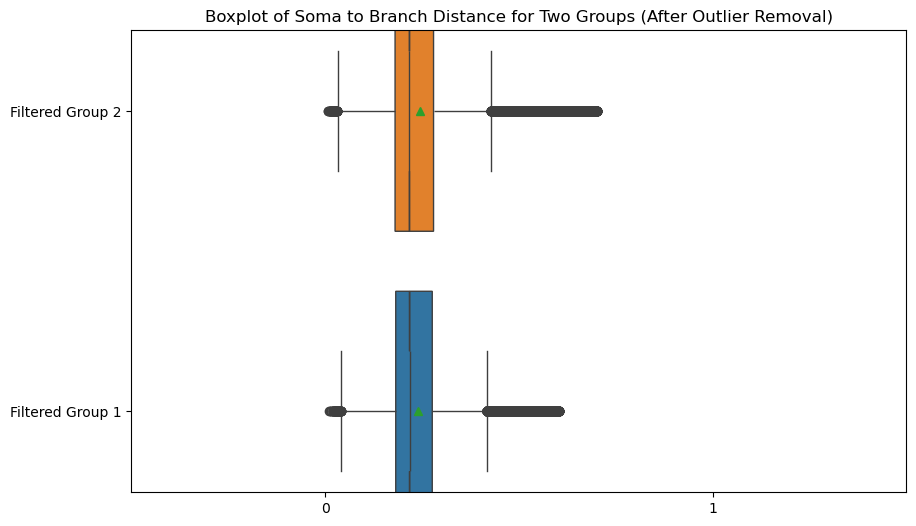

Mann-Whitney U Statistic: 6879667861.0
p-value: 0.47857424533828263
结果不显著，无法拒绝原假设：两组数据的分布没有显著差异。


In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu


def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

filtered_df1 = new_df2[(new_df2['Branches Length'] == 1)]
filtered_df2 = new_df2[(new_df2['Branches Length'] >= 0.12) & (new_df2['Branches Length'] <= 1)]

filtered_df1_clean = remove_outliers(filtered_df1, 'Soma to Branch Distance')
filtered_df2_clean = remove_outliers(filtered_df2, 'Soma to Branch Distance')

data1 = filtered_df1_clean['Soma to Branch Distance'].values
data2 = filtered_df2_clean['Soma to Branch Distance'].values

plt.figure(figsize=(10, 6))
sns.boxplot(data=[data1, data2], notch=True, vert=False, patch_artist=True, showmeans=True)
plt.yticks([0, 1], ['Filtered Group 1', 'Filtered Group 2'])
plt.title('Boxplot of Soma to Branch Distance for Two Groups (After Outlier Removal)')
plt.show()

stat, p_value = mannwhitneyu(data1, data2, alternative='two-sided')

print(f"Mann-Whitney U Statistic: {stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("结果显著，拒绝原假设：两组数据的分布有显著差异。")
else:
    print("结果不显著，无法拒绝原假设：两组数据的分布没有显著差异。")
